from https://www.kaggle.com/code/kingabzpro/alcoholic-drinks-in-russia-and-design-promotional


**DATA**
 - "year" - year (1998-2016)
 - "region" - the name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city, and a         single autonomous oblast
 - "wine" - sale of wine in liters by year per capita
 - "beer" - sale of beer in liters by year per capita
 - "vodka" - sale of vodka in liters by year per capita
 - "champagne" - sale of champagne in liters by year per capita
 - "brandy" - sale of brandy in liters by year per capita

from https://www.kaggle.com/code/foolwuilin/quantile-k-means-and-hierarchical-clustering/notebook


Summary¶
Assuming a company sells different kinds of alcohol across regions in Russia, there was a success after running a wine promotion in Saint Petersburg. This analysis would like to suggest further promotions to maximize the profits. However, the current situation allows us to target only a few regions due to a limited budget. By generating more short-term wins, our company will eventually extend the business throughout the country.

With regards to figuring out the current situation, analyzing the micro and macro environment is required. For example, Porter’s five forces model is a common tool to understand a business' micro-environment (Chaffey, 2019, p70). To analyse the impacts of external factors, PESTLE can be used for knowing the macro environment (Brown, 2019, p29). This report will use clustering methods to select the regions with the same wine buying behavior as Saint Petersburg. It is a part of macro environment analysis that our business can earn a higher possibility to succeed by knowing external factors. Apparently, the regions where people have a similar buying trend would be potentially affected by the same wine promotion we proceeded in Saint Petersburg.

Since the budget allows us to pick only 10 regions for the next marketing campaign, this report will not only cluster the regions by historical wine sales at all times but take into account the recent sales of all alcohol. In this way, this report is able to recommend the priority of these 10 regions for the promotions. It will be beneficial for operation management as well as project management in regards to a limited budget.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

import os
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from sklearn.preprocessing import LabelEncoder

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

from scipy.spatial.distance import pdist, squareform

from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [3]:
df = pd.read_csv('./russia_alcohol.csv')
df.head()


year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2

In [10]:
df[(df['region'] == 'Amur Oblast') & (df['year'] == '1998')] 
df[df['region'] == 'Amur Oblast']

year       region  wine   beer  vodka  champagne  brandy
2     1998  Amur Oblast  2.10  21.20  17.30        0.7    0.40
87    1999  Amur Oblast  2.90  26.70  16.20        0.7    0.20
172   2000  Amur Oblast  2.40  28.50  15.80        0.7    0.20
257   2001  Amur Oblast  2.60  31.20  17.60        0.6    0.20
342   2002  Amur Oblast  2.30  35.40  17.90        0.5    0.20
427   2003  Amur Oblast  5.30  40.40  17.40        0.6    0.20
512   2004  Amur Oblast  5.20  44.80  18.10        0.6    0.20
597   2005  Amur Oblast  5.80  48.60  20.80        0.7    0.20
682   2006  Amur Oblast  5.90  54.80  19.30        0.8    0.30
767   2007  Amur Oblast  5.70  64.60  17.30        1.0    0.30
852   2008  Amur Oblast  6.50  71.10  13.80        1.2    0.50
937   2009  Amur Oblast  6.90  75.30  10.50        1.2    0.50
1022  2010  Amur Oblast  7.60  75.80  11.60        1.6    0.60
1107  2011  Amur Oblast  7.21  83.27  12.02        1.9    0.64
1192  2012  Amur Oblast  5.80  75.80  13.30        1.9    0.60
1277  2013  Amur Oblast  6.70  75.10  10.20        1.9    0.70
1362  2014  Amur Oblast  6.10  64.00   8.30        1.8    0.60
1447  2015  Amur Oblast  6.00  50.70   6.70        1.5    0.50
1532  2016  Amur Oblast  6.20  46.90   6.00        1.3    0.50

In [3]:
df.describe()


year         wine         beer        vodka    champagne  \
count  1615.000000  1552.000000  1557.000000  1554.000000  1552.000000   
mean   2007.000000     5.628144    51.260148    11.818694     1.313177   
std       5.478922     2.813208    25.372821     5.128806     0.797956   
min    1998.000000     0.100000     0.400000     0.050000     0.100000   
25%    2002.000000     3.575000    32.400000     8.300000     0.800000   
50%    2007.000000     5.400000    49.970000    11.500000     1.200000   
75%    2012.000000     7.377500    67.400000    15.000000     1.665000   
max    2016.000000    18.100000   207.300000    40.600000     5.560000   

            brandy  
count  1549.000000  
mean      0.526998  
std       0.400201  
min       0.000000  
25%       0.200000  
50%       0.400000  
75%       0.700000  
max       2.300000

In [615]:
len(df['region'].unique())

85

Показывает корреляцию

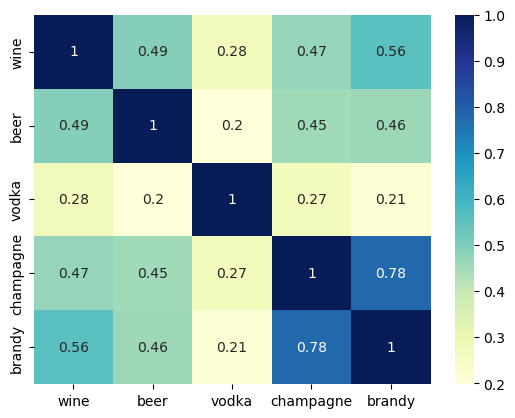

In [4]:
d_df = df[['wine','beer','vodka', 'champagne', 'brandy']]
dataplot = sns.heatmap(d_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [6]:
NA = pd.DataFrame(
    data =[
            df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

In [534]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

In [7]:
df.fillna(method="pad", inplace=True)

/var/folders/y5/24l_kybn3bdgl94q31jdb_1h0000gp/T/ipykernel_32252/3872787683.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="pad", inplace=True)


In [590]:

columns = ['brandy', 'wine', 'beer', 'vodka', 'champagne']
for col in columns:
    df[col] = df[col].fillna(df[col].mean())


In [8]:
df.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

In [157]:
df

year                          region  wine  beer  vodka  champagne  \
0     1998              Republic of Adygea   1.9   8.8    3.4        0.3   
1     1998                      Altai Krai   3.3  19.2   11.3        1.1   
2     1998                     Amur Oblast   2.1  21.2   17.3        0.7   
3     1998              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4     1998                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...    ...                             ...   ...   ...    ...        ...   
1610  2016                Chuvash Republic   5.0  42.3    7.7        0.7   
1611  2016       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612  2016        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613  2016  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614  2016                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  

[1615 rows x 7 columns]

In [117]:
df[]

year                          region  wine  beer  vodka  champagne  \
0    1998-01-01              Republic of Adygea   1.9   8.8    3.4        0.3   
1    1998-01-01                      Altai Krai   3.3  19.2   11.3        1.1   
2    1998-01-01                     Amur Oblast   2.1  21.2   17.3        0.7   
3    1998-01-01              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4    1998-01-01                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...         ...                             ...   ...   ...    ...        ...   
1610 2016-01-01                Chuvash Republic   5.0  42.3    7.7        0.7   
1611 2016-01-01       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612 2016-01-01        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613 2016-01-01  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614 2016-01-01                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  total_alcohol  
0        0.1           14.5  
1        0.1           35.0  
2        0.4           41.7  
3        0.3           27.3  
4        0.2           31.4  
...      ...            ...  
1610     0.4           56.1  
1611     1.1           52.4  
1612     0.5           70.9  
1613     1.3           91.5  
1614     1.0           59.5  

[1615 rows x 8 columns]

In [621]:
data_pivot = df.pivot(index='region', columns='year', values='wine')
data_pivot

year                            1998  1999  2000  2001  2002  2003  2004  \
region                                                                     
Altai Krai                       3.3   2.2   2.1   2.3   1.6   1.7   2.0   
Altai Republic                   3.4   4.8   5.4   5.7   5.7   6.4   6.7   
Amur Oblast                      2.1   2.9   2.4   2.6   2.3   5.3   5.2   
Arkhangelsk Oblast               4.3   4.6   5.5   7.0   8.1   9.2   7.0   
Astrakhan Oblast                 2.9   3.8   3.7   3.8   4.1   4.5   4.8   
...                              ...   ...   ...   ...   ...   ...   ...   
Vologda Oblast                   3.9   2.5   3.7   7.8  11.7  18.1  14.2   
Voronezh Oblast                  1.3   2.1   3.4   3.6   2.8   3.1   3.4   
Yamalo-Nenets Autonomous Okrug   3.0   4.1   4.6   5.2   5.8   5.0   4.9   
Yaroslavl Oblast                 3.5   3.6   3.5   4.3   4.5   3.8   3.9   
Zabaykalsky Krai                 0.9   1.1   1.9   3.5   4.7   5.9  15.7   

year                            2005  2006  2007  2008  2009  2010   2011  \
region                                                                      
Altai Krai                       2.0   2.2   2.5   3.5   3.8   4.1   4.51   
Altai Republic                   6.0   4.0   4.8   6.0   5.5   6.1   5.71   
Amur Oblast                      5.8   5.9   5.7   6.5   6.9   7.6   7.21   
Arkhangelsk Oblast               7.6   8.6  10.1  10.7  11.3  12.0  12.23   
Astrakhan Oblast                 4.2   3.9   4.1   5.0   5.9   6.1   4.92   
...                              ...   ...   ...   ...   ...   ...    ...   
Vologda Oblast                  10.6   7.7   9.4  10.1  12.9   9.2  10.34   
Voronezh Oblast                  3.5   3.7   4.7   5.5   7.1   6.6   6.02   
Yamalo-Nenets Autonomous Okrug   4.2   3.0   6.6   7.2   7.1   7.7   6.33   
Yaroslavl Oblast                 5.5   5.7   9.7  10.4  10.0  11.3  10.27   
Zabaykalsky Krai                16.3  13.7   6.7   6.9   6.5   6.4   6.52   

year                            2012  2013  2014  2015  2016  
region                                                        
Altai Krai                       4.8   4.4   4.1   4.4   4.8  
Altai Republic                   5.2   4.2   4.2   4.3   4.5  
Amur Oblast                      5.8   6.7   6.1   6.0   6.2  
Arkhangelsk Oblast               9.2   9.2  10.7   9.0   8.4  
Astrakhan Oblast                 4.7   4.2   5.1   4.7   4.5  
...                              ...   ...   ...   ...   ...  
Vologda Oblast                   9.8   8.2  10.0   8.5   8.6  
Voronezh Oblast                  7.5   7.0   5.8   5.5   5.5  
Yamalo-Nenets Autonomous Okrug   6.3   5.8   5.0   4.6   4.5  
Yaroslavl Oblast                 9.7   7.6   9.9   9.3  10.2  
Zabaykalsky Krai                 6.6   6.4   6.6   6.6   6.4  

[85 rows x 19 columns]

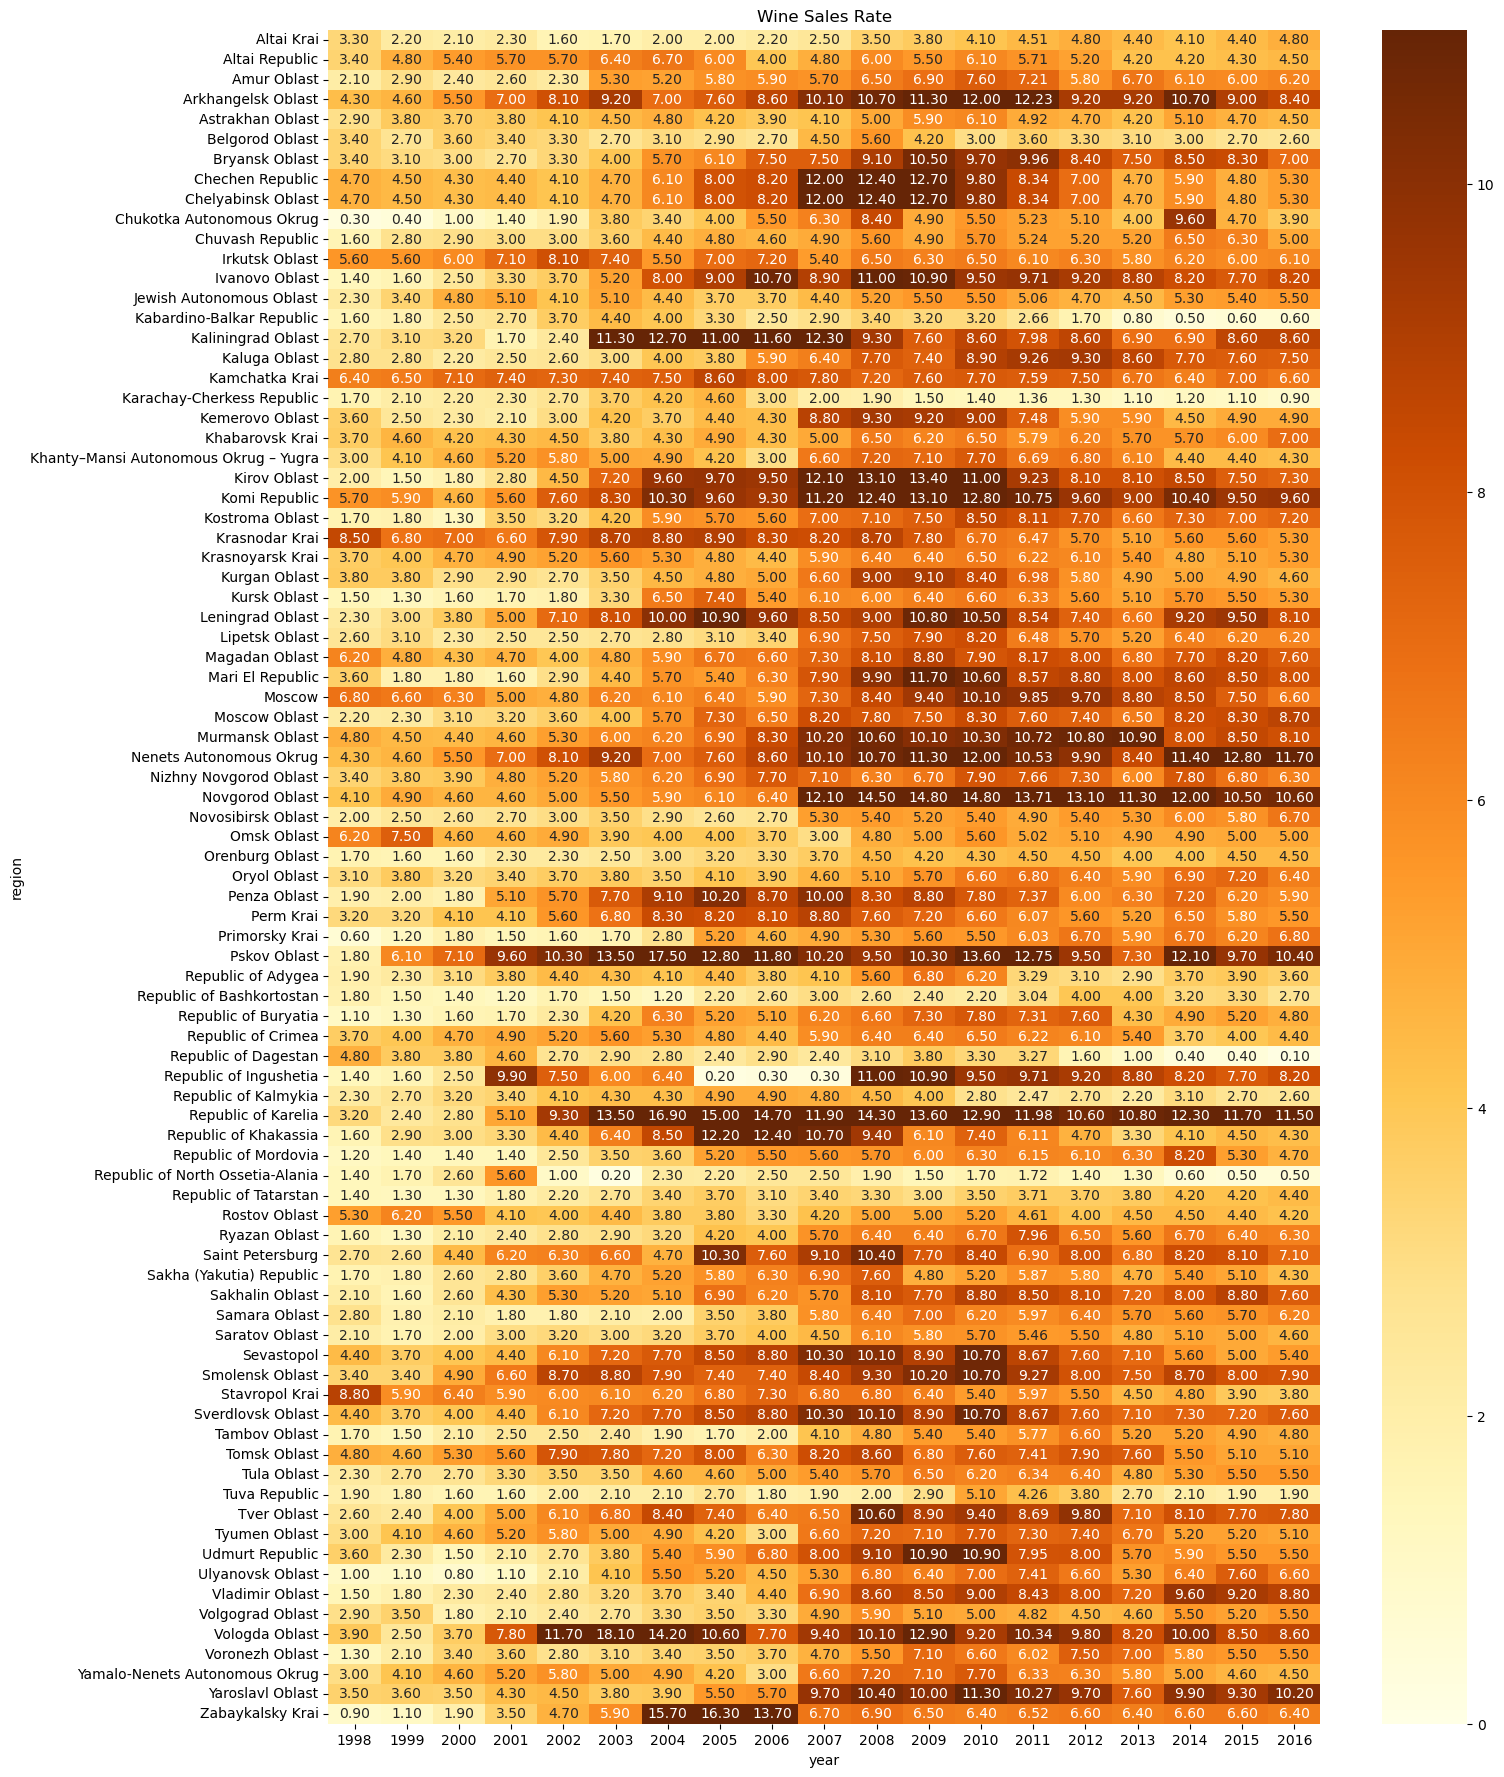

In [538]:
#Visualize the pivot table to see the sales trend in relative magnitude.
plt.subplots(figsize=(16, 22))
ax = sns.heatmap(data_pivot, annot=True, fmt='.2f', vmin=0.0, vmax=11.0, cmap='YlOrBr')
plt.title('Wine Sales Rate')
plt.show()

Geo Location
For geolocation, we need to get coordinates to display stat on the map. For that we need:

 - geopy -> Nominatim
 - creating user agent to connect to geopy server.
 - create lat and lon function to extract latitude and longitude using the name of the place.
 - value count the region column, resetting index, and then renaming columns.
 - applying both functions on to geo['region']
 - export the file as "russian_geo.csv"

In [9]:
import time
from geopy.geocoders import Nominatim

app = Nominatim(user_agent="russia")

def lat(x): 
    time.sleep(1)
    try:
        #return app.geocode(x).raw["lat"]
        return app.geocode(x).latitude
    except:
        return lat(x)   
    
def lon(x):    
    time.sleep(1)
    try:
        #return app.geocode(x).raw["lon"]
        return app.geocode(x).longitude
    except:
        return lon(x)   

geo = df['region'].value_counts()
geo = geo.reset_index()
geo.columns = ['region', 'count']
#geo = geo.to_frame().reset_index().rename(columns={"region":"count","index":"region"})
geo['lat'] = geo['region'].apply(lat)
geo['lon'] = geo['region'].apply(lon)

#geo.drop('count',axis=1).to_csv("russian_geo.csv",index=False)
geo.drop('count', axis=1, inplace=True)
geo.to_csv("russian_geo.csv", index=False)

 - loading geo location dataset.
 - merging it with main dataset.
 - group by "region" and mean.
 - sort values by "beer" descending.

In [11]:
geo = pd.read_csv("russian_geo.csv")
df_geo = (
    pd.merge(df, geo, on="region")
    .groupby("region")
    .mean()
    .reset_index()
    .sort_values("beer", ascending=False)
)
df_geo

region    year      wine       beer      vodka  \
61                  Saint Petersburg  2007.0  6.952632  84.375263  11.821579   
33                            Moscow  2007.0  7.381579  83.688421  19.022105   
82    Yamalo-Nenets Autonomous Okrug  2007.0  5.312105  80.137895  15.093158   
75                     Tyumen Oblast  2007.0  5.542105  76.950000  14.825789   
40                       Omsk Oblast  2007.0  4.827368  76.643684   8.804211   
..                               ...     ...       ...        ...        ...   
18        Karachay-Cherkess Republic  2007.0  2.118947  20.880526   6.435263   
53              Republic of Kalmykia  2007.0  3.472105  19.531579   8.866842   
57  Republic of North Ossetia-Alania  2007.0  1.743158  17.439474   4.897368   
9          Chukotka Autonomous Okrug  2007.0  4.175263  15.416316  12.712632   
51              Republic of Dagestan  2007.0  2.635263   4.644211   6.714737   

    champagne    brandy        lat         lon  
61   2.468947  1.117368  59.960674   30.158655  
33   4.386316  1.257895  55.750541   37.617478  
82   1.485789  0.951579  67.147163   74.341549  
75   1.426316  0.841579  58.820649   70.365884  
40   0.951579  0.381053  56.093526   73.509994  
..        ...       ...        ...         ...  
18   0.319474  0.275789  43.736833   41.726799  
53   0.743684  0.280000  46.901712   45.249161  
57   0.767368  0.140000  42.992071   44.263635  
9    2.057895  0.935789  66.000647  169.490087  
51   0.641053  0.272105  43.000000   47.000000  

[85 rows x 9 columns]

Map¶
In this section, we are going to plot the total alcohol consumption per region on the map.

 - we have created a new column name "total" which sums up all the drinks columns.
 - we have also created test columns that contain a caption, that will be displayed on the map.
 - we are dividing our dataset into three categories based, first contains the top 10, the second contains 11th to 21st and third contains the rest of the regions. The ranking is based on Alcohol consumption per region.
 - We are going to use Plotly sample code for plotting bubble maps.
The top 10 and 11-21 have no paterens. They are all over the place but we can see the pattern in the rest of the categories. You can also explore the different regions by hovering your mouse over and zooming out to observe more regions.

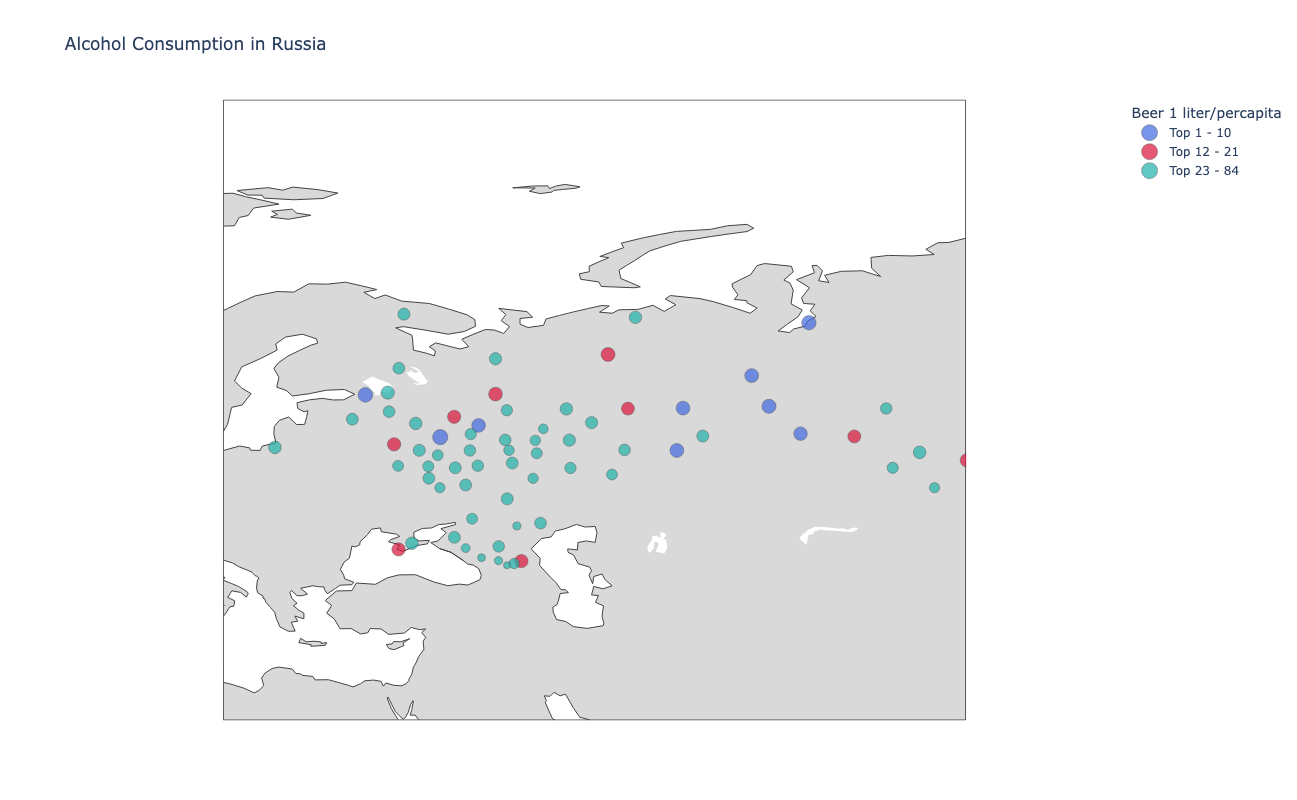

In [191]:
df_geo["total"] = (
    df_geo["wine"]
    + df_geo["brandy"]
    + df_geo["vodka"]
    + df_geo["beer"]
    + df_geo["champagne"]
)
df_geo["text"] = (
    df_geo["region"] + "<br> Alcohol consumption:" + (df_geo["total"]).astype(str)
)
# limits = [(0,99),(100,299),(300,499),(500,999),(1000,3000)]

limits = [(0, 10), (11, 21), (22, 84)]
colors = ["royalblue", "crimson", "lightseagreen"]
scale = 500

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_geo[lim[0] : lim[1]]
    fig.add_trace(
        go.Scattergeo(
            lon=df_sub["lon"],
            lat=df_sub["lat"],
            text=df_sub["text"],
            marker=dict(
                size=df_sub["total"],
                color=colors[i],
                line_color="rgb(40,40,40)",
                line_width=0.5,
                sizemode="area",
            ),
            name="Top {0} - {1}".format(lim[0] + 1, lim[1]),
        )
    )

fig.update_layout(
    width=1500,  # Ширина в пикселях
    height=800,   # Высота в пикселях
    title_text="Alcohol Consumption in Russia",
    showlegend=True,
    legend_title="Beer 1 liter/percapita",
    legend_title_font_size=14,
    geo=dict(
        scope="world",
        landcolor="rgb(217, 217, 217)",
        lonaxis=dict(range=[23.6985, 80.06269]),
        lataxis=dict(range=[33.72197, 80.7293]),
    ),
)

fig.show()

Alcohol Consumption Past Trend

In this section, we are going to explore different types of drinks and their consumption trend over the past 19 years.

As we can see beer consumption has risen with time up till 2007, then it became steady and its declining since 2011. Wine, champagne, and brandy consumption are lower than beer but they are steady. The vodka demand has increased up till 2002 and it's declining slowly and steadily with time.

The safest bet is to launch a campaign on either brandy or champagne but wine can be profitable as it has more consumption per capita and it is stable

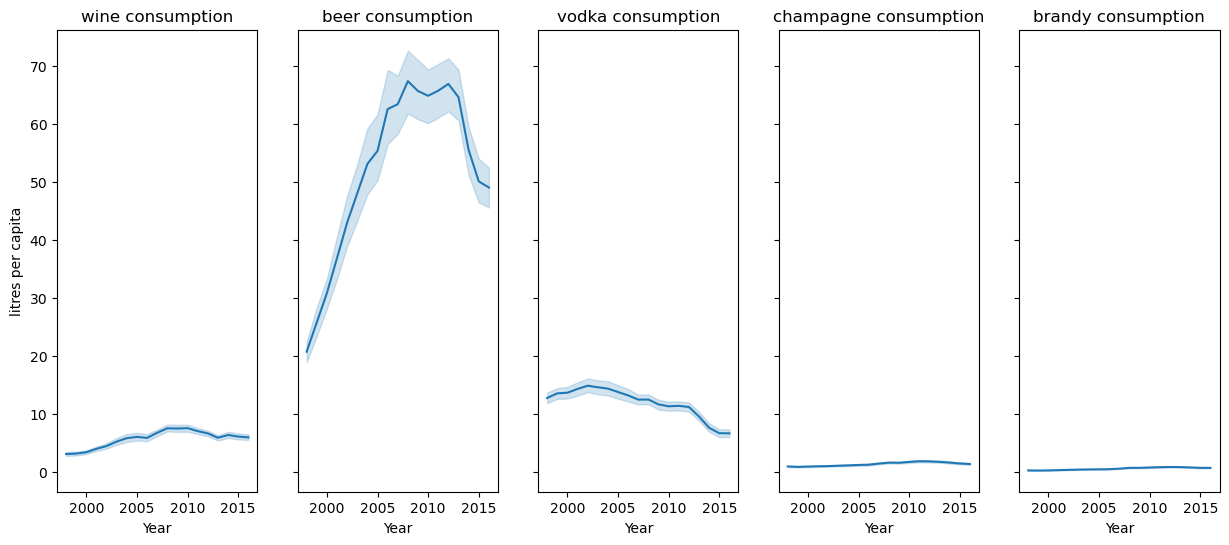

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharey=True)
for x in range(1, 6, 1):

    column_name = df.columns[x + 1]
    sns.lineplot(data=df, x="year", y=f"{column_name}", ax=axes[x - 1])
    axes[x - 1].set_title(f"{column_name} consumption")
    axes[x - 1].set_xlabel("Year")
    axes[x - 1].set_ylabel("litres per capita")

Animation

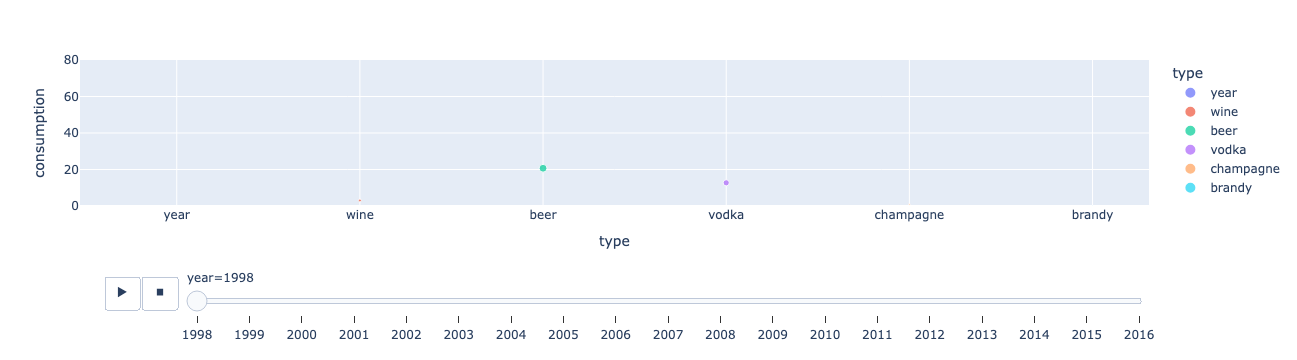

In [625]:
#year_df = (
#    df.groupby("year")
#    .mean()
#    .stack(0)
#    .reset_index()
#    .rename(columns={"level_1": "type", 0: "consumption"})
#)
# year_df['total'] = year_df['wine']+year_df['brandy']+year_df['vodka']+year_df['beer']+year_df['champagne']
#fig = px.scatter(
#    year_df,
#    x="type",
#    y="consumption",
#    animation_frame="year",
#    color="type",
#    size="consumption",
#    size_max=55,
#    # range_x=[100,100000],
#    range_y=[0, 60],
#)


numeric_cols = df.select_dtypes(include='number').columns

year_df = (
    df.groupby("year")[numeric_cols]
    .mean()
    .stack(0)
    .reset_index()
    .rename(columns={"level_1": "type", 0: "consumption"})
)
fig = px.scatter(
    year_df,
    x="type",
    y="consumption",
    animation_frame="year",
    color="type",
    size="consumption",
    size_max=55,
    range_y=[0, 80],
)



# fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

**Kmean Clusters**

Finding cluster is a subcategory of supervised learning where there are no targets available in training data. Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

First, we need to find how many clusters are there in our data, before that we need to create our X for that we are going to group the dataset by "region" and take average values. Then we are going to run SKlearn KMeans on a range from 1 to 9. There are 2 elbows in our line plot, we will be checking both of them. The Elbow method tells us to select the cluster when there is a significant change in inertia.

We have discovered elbow at 2 and at 3.

https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189

In [15]:
X = df.groupby(["region"])[["wine", "beer", "vodka", "champagne", "brandy"]].mean()
X

wine       beer      vodka  champagne  \
region                                                                      
Altai Krai                      3.174211  48.373158   9.465789   1.207368   
Altai Republic                  5.190000  36.724211   9.683684   0.934737   
Amur Oblast                     5.221579  53.377368  14.216842   1.115789   
Arkhangelsk Oblast              8.670000  47.036842  17.381053   1.631053   
Astrakhan Oblast                4.469474  54.695263   9.296842   0.861579   
...                                  ...        ...        ...        ...   
Vologda Oblast                  9.328421  67.206842  17.217895   0.857368   
Voronezh Oblast                 4.637895  54.911053   9.916316   1.500000   
Yamalo-Nenets Autonomous Okrug  5.312105  80.137895  15.093158   1.485789   
Yaroslavl Oblast                7.193158  63.331579  14.944211   1.241053   
Zabaykalsky Krai                6.806316  67.812105  14.237368   1.114211   

                                  brandy  
region                                    
Altai Krai                      0.236842  
Altai Republic                  0.253684  
Amur Oblast                     0.396842  
Arkhangelsk Oblast              0.870526  
Astrakhan Oblast                0.361053  
...                                  ...  
Vologda Oblast                  0.517895  
Voronezh Oblast                 0.402105  
Yamalo-Nenets Autonomous Okrug  0.951579  
Yaroslavl Oblast                0.571053  
Zabaykalsky Krai                0.439474  

[85 rows x 5 columns]

In order to cluster regions by a time series of wine sales, this report will use K-means clustering. The K-means algorithm would allow the clustering process to allocate every data point to the nearest cluster with the shortest distance between points and the centroids (Garbade, 2018). Thus, by using K-means clustering, this report is able to split the regions into different groups having similar buying behavior of wine based on the sales trend.

However, before starting K-means clustering, figuring out the ideal number of clusters is required. Too few clusters would cause the entities in a group to have many different traits. Too many groups would cause that there is not much difference between groups. Therefore, this section proceeds with the Elbow method in order to determine the best number of clusters.

**Elbow method**

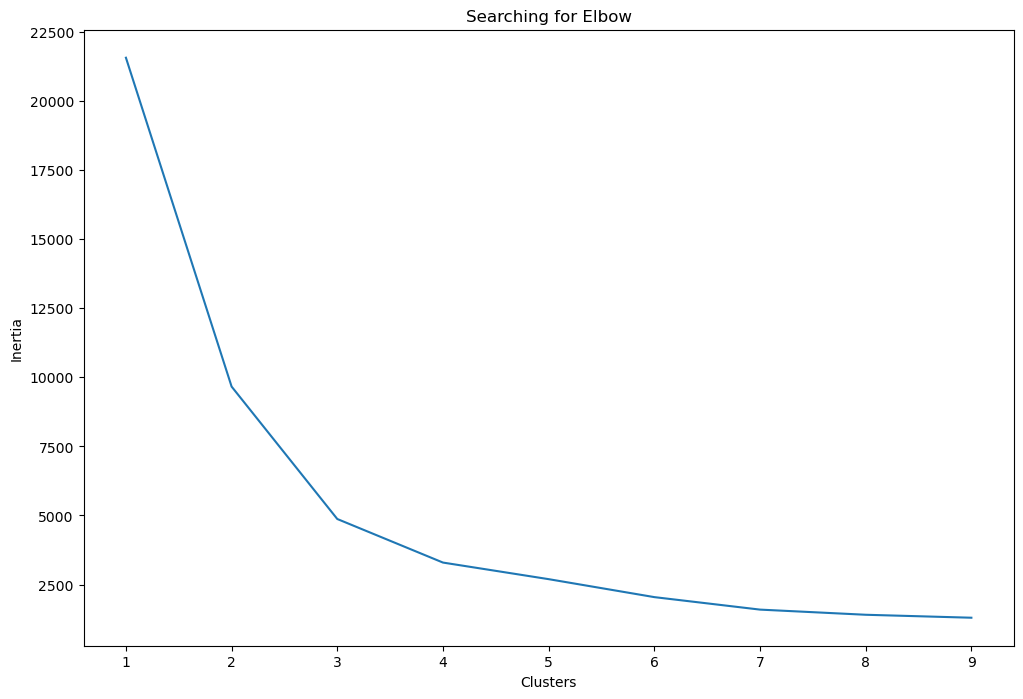

In [23]:

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title("Searching for Elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia");

**Silhouette coefficient method**

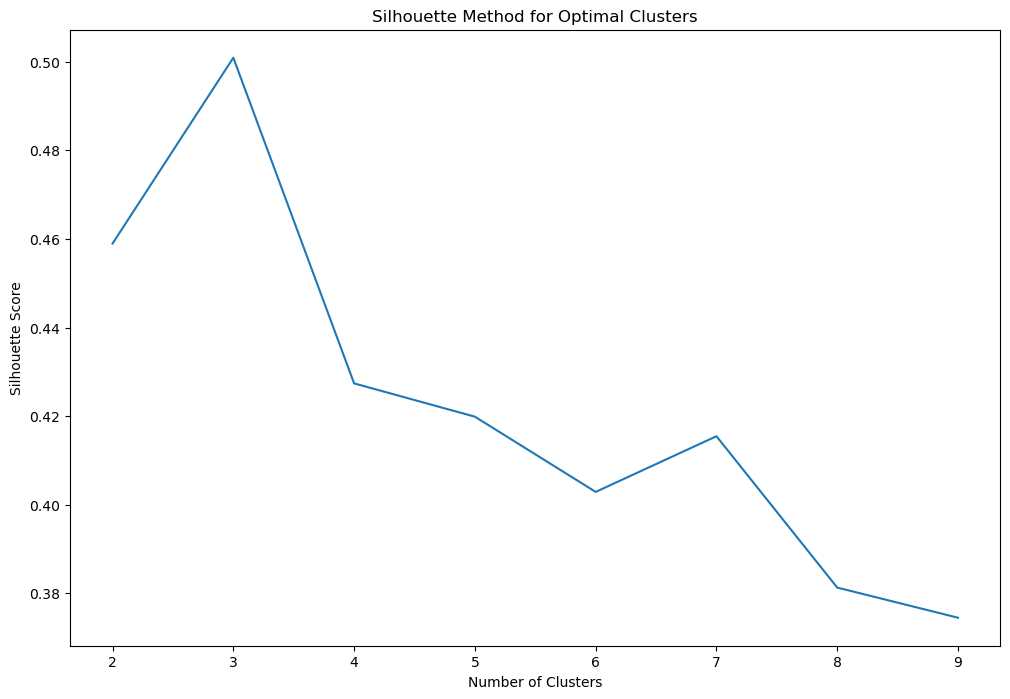

In [24]:
silhouette_scores = []

for i in range(2, 10):  # Start from 2 because silhouette score is not defined for 1 cluster
    km = KMeans(n_clusters=i, random_state=42).fit(X)
    score = silhouette_score(X, km.labels_)
    silhouette_scores.append(score)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 10)), y=silhouette_scores, ax=ax)
ax.set_title("Silhouette Method for Optimal Clusters")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
plt.show()

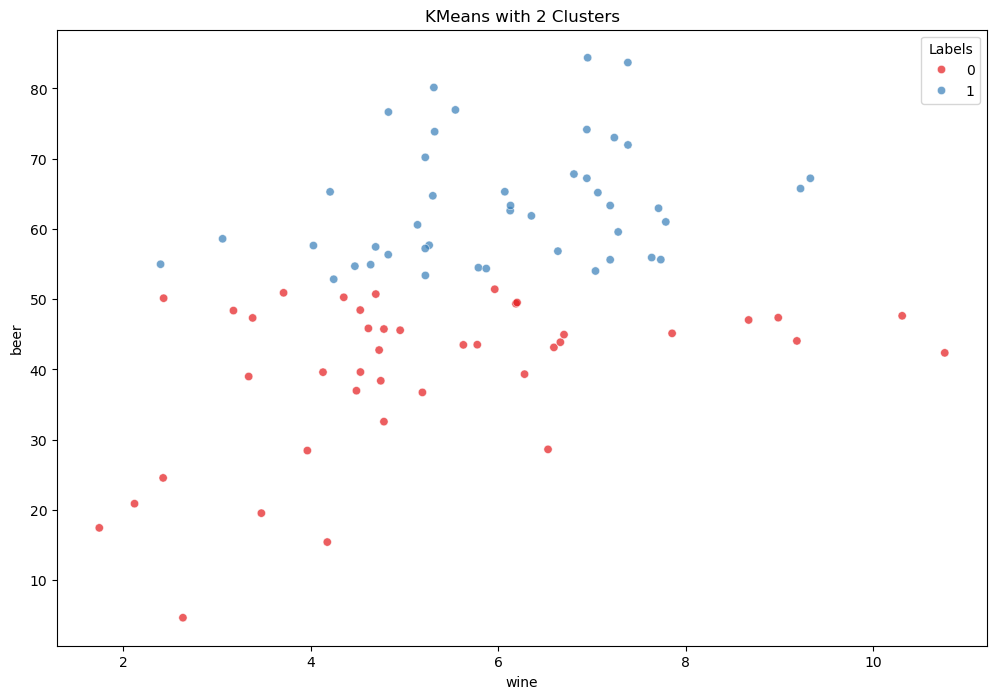

In [17]:
# это не нало, тк 3 лучше
km = KMeans(n_clusters=2).fit(X)

X["Labels"] = km.predict(X)

plt.figure(figsize=(12, 8))
#sns.scatterplot(X["wine"], X["beer"], hue=X["Labels"], palette="Set1", alpha=0.7)
sns.scatterplot(x=X["wine"], y=X["beer"], hue=X["Labels"], palette="Set1", alpha=0.7)
plt.title("KMeans with 2 Clusters")
plt.show()

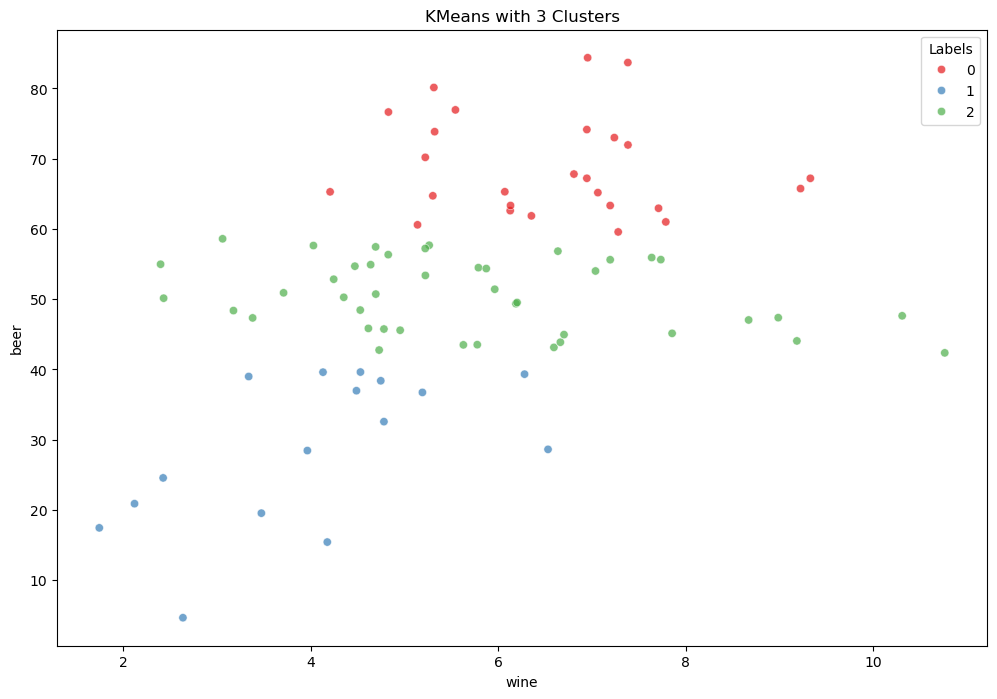

In [20]:
km = KMeans(n_clusters=3).fit(X)

X["Labels"] = km.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(x = X["wine"], y =  X["beer"], hue=X["Labels"], palette="Set1", alpha=0.7)
plt.title("KMeans with 3 Clusters")
plt.show()

In [256]:
#X[X['Labels'] == 2]

In [26]:
X.groupby('Labels').mean()

wine       beer      vodka  champagne    brandy
Labels                                                     
0       6.568239  68.792551  14.284838   1.608462  0.709494
1       4.033618  28.855757   9.070132   0.908026  0.354967
2       5.738421  50.499706  11.434614   1.286438  0.481481

**Cluster Visualization**

In this section we are going to compare the clusters on various columns and as you can see the best results are shown for beer V/S wine.

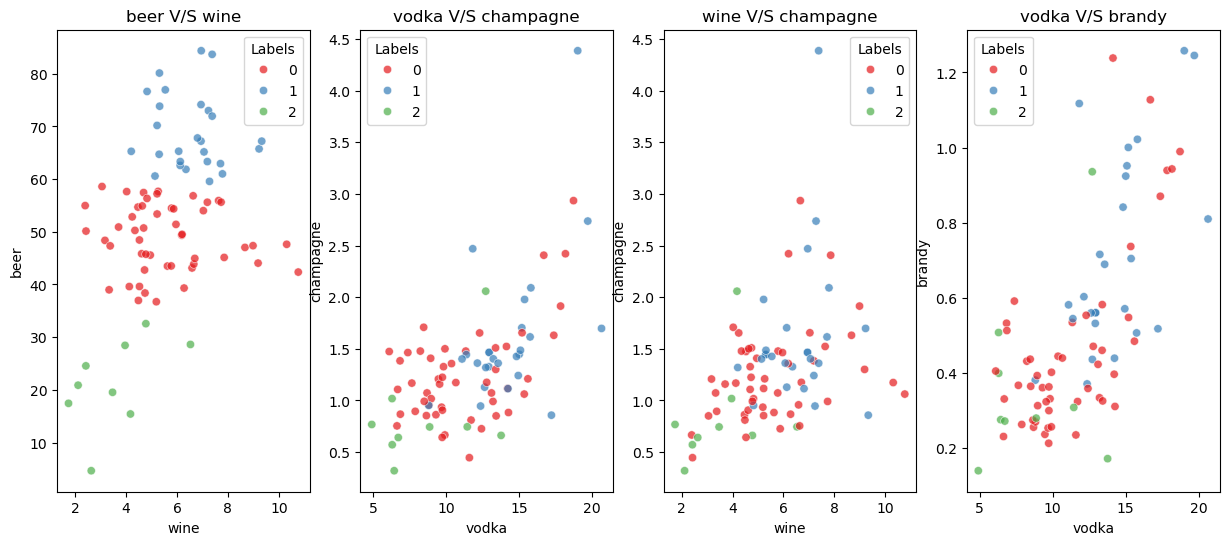

In [634]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

sns.scatterplot(
    x = X["wine"], y = X["beer"], hue=X["Labels"], palette="Set1", alpha=0.7, ax=axes[0]
)
axes[0].set_title("beer V/S wine")

sns.scatterplot(
    x = X["vodka"], y = X["champagne"], hue=X["Labels"], palette="Set1", alpha=0.7, ax=axes[1]
)
axes[1].set_title("vodka V/S champagne")

sns.scatterplot(
    x = X["wine"], y = X["champagne"], hue=X["Labels"], palette="Set1", alpha=0.7, ax=axes[2]
)
axes[2].set_title("wine V/S champagne")

sns.scatterplot(
   x =  X["vodka"], y = X["brandy"], hue=X["Labels"], palette="Set1", alpha=0.7, ax=axes[3]
)
axes[3].set_title("vodka V/S brandy")

plt.show()


**Clusters Swarmplot**
Let's visualize our results using Swamplot.

We can clearly see the orange has the highest average consumption in all drinks categories. They all are following similar rules of ranking. The orange is high, the blue is medium and the green is low. We are going to use this to pick the top ten regions and products.

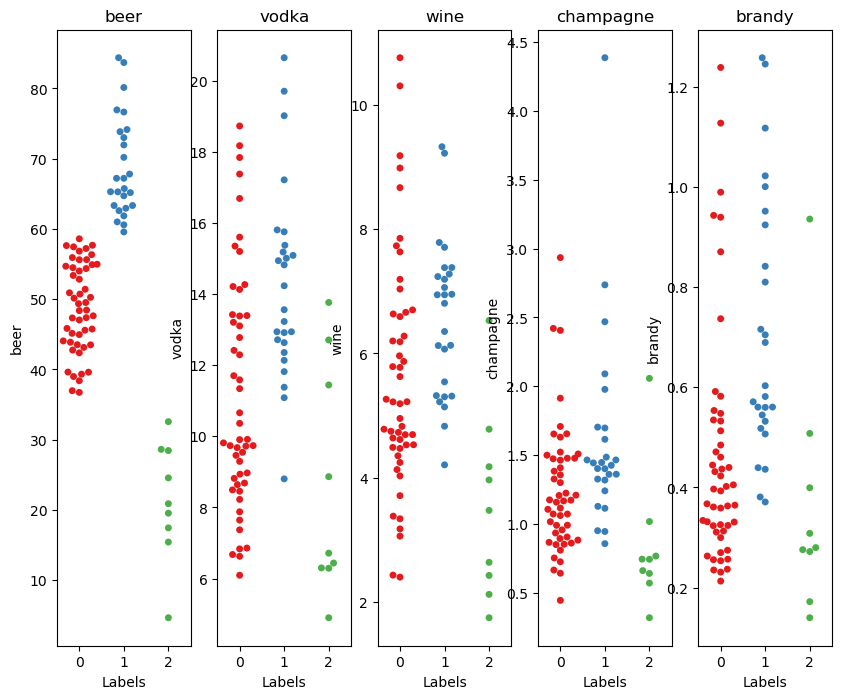

In [635]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(151)
sns.swarmplot(x="Labels", y="beer", palette="Set1", data=X, ax=ax1)
ax1.set_title("beer")

ax2 = fig.add_subplot(152)
sns.swarmplot(x="Labels", y="vodka", palette="Set1", data=X, ax=ax2)
ax2.set_title("vodka")

ax3 = fig.add_subplot(153)
sns.swarmplot(x="Labels", y="wine", palette="Set1", data=X, ax=ax3)
ax3.set_title("wine")

ax4 = fig.add_subplot(154)
sns.swarmplot(x="Labels", y="champagne", palette="Set1", data=X, ax=ax4)
ax4.set_title("champagne")

ax5 = fig.add_subplot(155)
sns.swarmplot(x="Labels", y="brandy", palette="Set1", data=X, ax=ax5)
ax5.set_title("brandy")

plt.show()

**Total drinks swarm plot**

To summarise our findings let's visualize total alcohol consumption and clusters. It is now clear the hypothesis was true about the orange to begin at the top of the ladder.

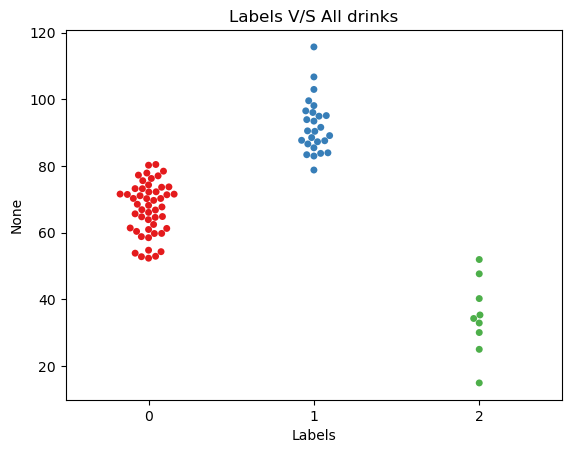

In [636]:
com_X = X["beer"] + X["wine"] + X["champagne"] + X["vodka"] + X["brandy"]
sns.swarmplot(x="Labels", y=com_X, palette="Set1", data=X)
plt.title("Labels V/S All drinks");

**Hierarchy Cluster**

We will be using scipy spatial distance_matrix to calculate the distance from each point to every other point of a dataset. The function distance_matrix requires two inputs and we are adding X and X.

We will then use scipy hierarchy linkage using the average method to create links between each cluster, which later will be used to plot the dendrogram.

In [637]:
dist = distance_matrix(X, X)
Z = hierarchy.linkage(dist, "average")


In [638]:
result_df = pd.DataFrame(dist, index=X.index, columns=X.index)
result_df 

region                          Altai Krai  Altai Republic  Amur Oblast  \
region                                                                    
Altai Krai                        0.000000       11.827234     7.200023   
Altai Republic                   11.827234        0.000000    17.260691   
Amur Oblast                       7.200023       17.260691     0.000000   
Arkhangelsk Oblast                9.758171       13.363218     7.911762   
Astrakhan Oblast                  6.466086       17.990120     5.155076   
...                                    ...             ...          ...   
Vologda Oblast                   21.304427       31.688444    14.771873   
Voronezh Oblast                   6.723270       18.206090     4.618988   
Yamalo-Nenets Autonomous Okrug   32.354671       43.770036    26.801987   
Yaroslavl Oblast                 16.463056       27.218236    10.224898   
Zabaykalsky Krai                 20.368666       31.478126    14.555936   

region                          Arkhangelsk Oblast  Astrakhan Oblast  \
region                                                                 
Altai Krai                                9.758171          6.466086   
Altai Republic                           13.363218         17.990120   
Amur Oblast                               7.911762          5.155076   
Arkhangelsk Oblast                        0.000000         11.937418   
Astrakhan Oblast                         11.937418          0.000000   
...                                            ...               ...   
Vologda Oblast                           20.224044         15.617832   
Voronezh Oblast                          11.585334          0.931636   
Yamalo-Nenets Autonomous Okrug           33.364911         26.141407   
Yaroslavl Oblast                         16.579490         10.727781   
Zabaykalsky Krai                         21.128667         14.247496   

region                          Belgorod Oblast  Bryansk Oblast  \
region                                                            
Altai Krai                             9.419920        6.294856   
Altai Republic                         3.093731        6.617441   
Amur Oblast                           15.530996       11.661993   
Arkhangelsk Oblast                    13.019492        9.678757   
Astrakhan Oblast                      15.761726       11.765880   
...                                         ...             ...   
Vologda Oblast                        30.101527       25.663994   
Voronezh Oblast                       16.029827       12.002330   
Yamalo-Nenets Autonomous Okrug        41.712347       37.577916   
Yaroslavl Oblast                      25.451298       21.143008   
Zabaykalsky Krai                      29.575601       25.288509   

region                          Chechen Republic  Chelyabinsk Oblast  \
region                                                                 
Altai Krai                             19.553168           26.301898   
Altai Republic                         30.732652           37.624104   
Amur Oblast                            14.039002           20.907659   
Arkhangelsk Oblast                     20.754992           27.545831   
Astrakhan Oblast                       13.321404           19.980300   
...                                          ...                 ...   
Vologda Oblast                          4.932008            8.514434   
Voronezh Oblast                        12.914620           19.635330   
Yamalo-Nenets Autonomous Okrug         13.211896            6.582078   
Yaroslavl Oblast                        4.377293           11.004352   
Zabaykalsky Krai                        1.480683            6.478124   

region                          Chukotka Autonomous Okrug  ...  Tyumen Oblast  \
region                                                     ...                  
Altai Krai                                      33.210081  ...      29.195652   
Altai Republic                     


**Dendrogram**
  
Hierarchical clustering is typically visualized as a dendrogram every unique cluster is represented with different colors. As you can see how each node is connected forming this hierarchy of clusters.

It seems like we have 4 hierarchical clusters that are determined by different colors.

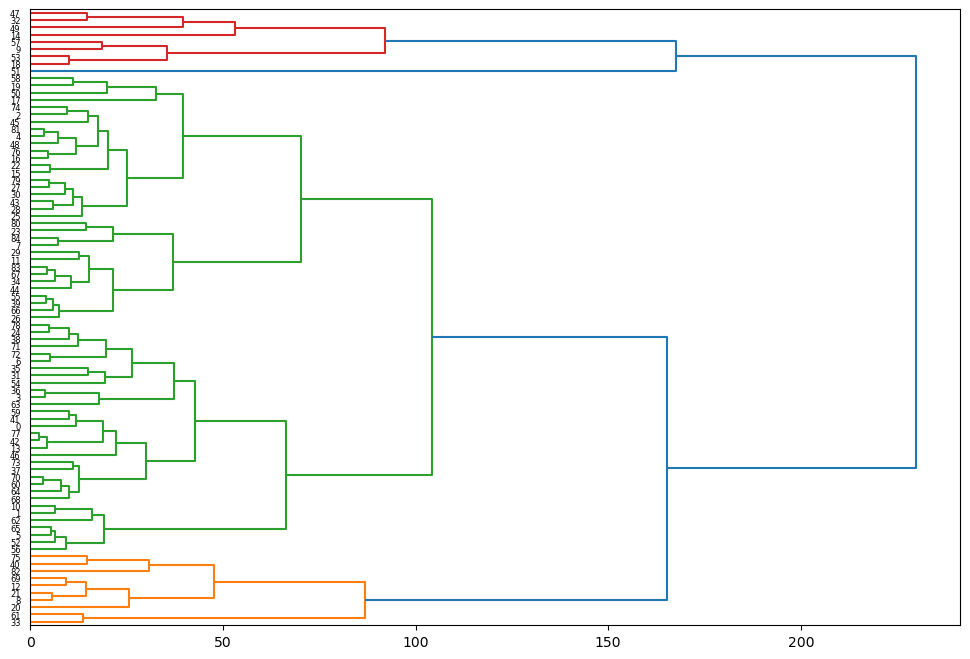

In [639]:
plt.figure(figsize=(12, 8))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=6, orientation="right")

**Hierarchy Agglomerative Clustering**

Using Agglomerative clustering we are going to devide our dataset in 4 clusters. 

In [640]:
c = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

The 4 clusters are almost similar to Kmeans 3 clusters but the medium cluster is divided. We will be using both Kmeans and hierarchy clusters to determine optimum locations for a marketing campaign.

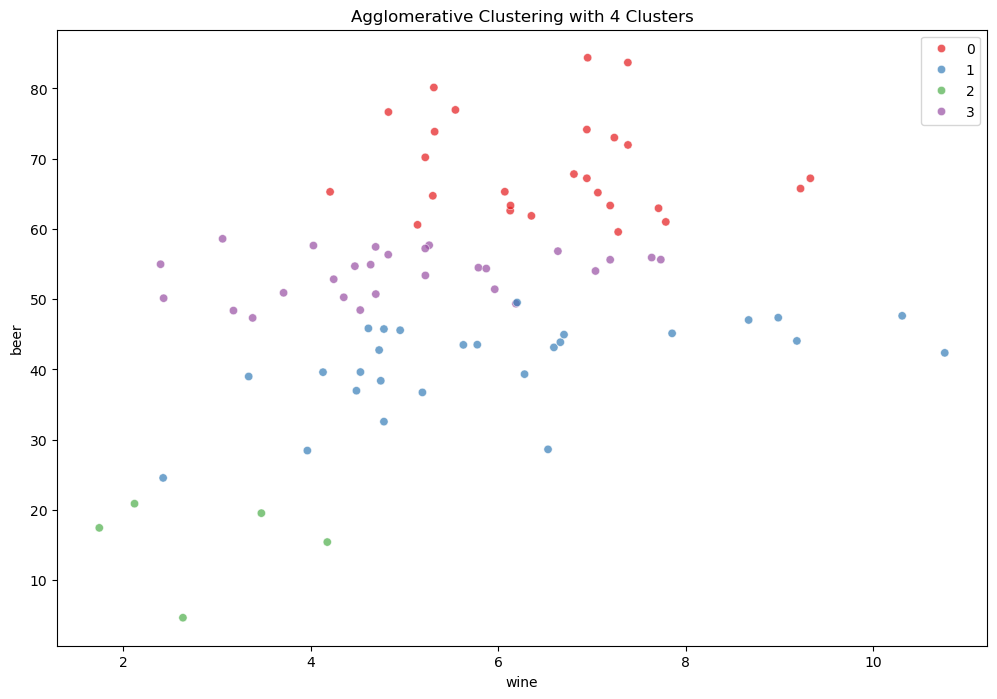

In [641]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X["wine"], y = X["beer"], hue=y_hc, palette="Set1", alpha=0.7)
plt.title("Agglomerative Clustering with 4 Clusters")
plt.show()

Categorizing Clusters
It's time to add both the Kmeans cluster and Hierarchical cluster into our main database.

 - creating a new column "H_Pop" and adding H cluster prediction.
 - renaming numerical values to categories based on popularity.
 - Filtering out to see top 2 values.

In [642]:
X["H_Pop"] = y_hc
X["H_Pop"] = X["H_Pop"].replace(2, "Low")
X["H_Pop"] = X["H_Pop"].replace(1, "Medium")
X["H_Pop"] = X["H_Pop"].replace(3, "High")
X["H_Pop"] = X["H_Pop"].replace(0, "Top")
X[X["H_Pop"] == "Top"].head(2)


wine       beer      vodka  champagne    brandy  \
region                                                                    
Chechen Republic    6.944211  67.210526  12.943684   1.465263  0.560526   
Chelyabinsk Oblast  6.944211  74.147368  12.943684   1.465263  0.560526   

                    Labels H_Pop  
region                            
Chechen Republic         1   Top  
Chelyabinsk Oblast       1   Top

In [643]:
X.loc['Moscow']

wine          7.381579
beer         83.688421
vodka        19.022105
champagne     4.386316
brandy        1.257895
Labels               1
H_Pop              Top
Name: Moscow, dtype: object

We are going to go the same with Kmean clusters:

 - Renaming column name from "Labels" to "KM_Pop"
 - Create a new column "Total_Drinks" and add total drinks values.
 - renaming numerical values to categories based on popularity.
 - Filtering out to see top 11 values sort by Total Acholo consumption.


In [644]:
X.rename(columns={"Labels": "KM_Pop"}, inplace=True)
X["Total_Drinks"] = com_X
X["KM_Pop"] = X["KM_Pop"].replace(2, "Low")
X["KM_Pop"] = X["KM_Pop"].replace(0, "High")
X["KM_Pop"] = X["KM_Pop"].replace(1, "Medium")


X[X["KM_Pop"] == "High"].sort_values("Total_Drinks", ascending=True).head(11)

wine       beer      vodka  champagne    brandy  \
region                                                                          
Belgorod Oblast           3.336842  38.987895   8.686842   1.072632  0.255789   
Altai Republic            5.190000  36.724211   9.683684   0.934737  0.253684   
Saratov Oblast            4.129474  39.605263   7.644737   1.167895  0.367368   
Republic of Ingushetia    6.279474  39.322105   6.857368   0.866842  0.513158   
Chuvash Republic          4.486316  36.966316  11.706842   0.810000  0.324211   
Republic of Mordovia      4.528947  39.622632   9.725789   0.642632  0.213158   
Sakha (Yakutia) Republic  4.745789  38.381053  13.387895   1.508947  0.460526   
Tula Oblast               4.728421  42.754211   9.739474   1.224211  0.363158   
Orenburg Oblast           3.378947  47.330526   7.877895   0.894737  0.263158   
Bryansk Oblast            6.592632  43.133158   8.818947   0.957368  0.270000   
Ulyanovsk Oblast          4.779474  45.747368   8.494211   0.991579  0.364737   

                         KM_Pop   H_Pop  Total_Drinks  
region                                                 
Belgorod Oblast            High  Medium     52.340000  
Altai Republic             High  Medium     52.786316  
Saratov Oblast             High  Medium     52.914737  
Republic of Ingushetia     High  Medium     53.838947  
Chuvash Republic           High  Medium     54.293684  
Republic of Mordovia       High  Medium     54.733158  
Sakha (Yakutia) Republic   High  Medium     58.484211  
Tula Oblast                High  Medium     58.809474  
Orenburg Oblast            High    High     59.745263  
Bryansk Oblast             High  Medium     59.772105  
Ulyanovsk Oblast           High  Medium     60.377368

In [645]:
df_total = X
df_total.sort_values('Total_Drinks', ascending=False)

wine       beer      vodka  champagne  \
region                                                                        
Moscow                            7.381579  83.688421  19.022105   4.386316   
Saint Petersburg                  6.952632  84.375263  11.821579   2.468947   
Yamalo-Nenets Autonomous Okrug    5.312105  80.137895  15.093158   1.485789   
Tyumen Oblast                     5.542105  76.950000  14.825789   1.426316   
Komi Republic                     9.223684  65.744211  20.654211   1.697368   
...                                    ...        ...        ...        ...   
Kabardino-Balkar Republic         2.424211  24.551579   6.298947   0.571053   
Republic of Kalmykia              3.472105  19.531579   8.866842   0.743684   
Karachay-Cherkess Republic        2.118947  20.880526   6.435263   0.319474   
Republic of North Ossetia-Alania  1.743158  17.439474   4.897368   0.767368   
Republic of Dagestan              2.635263   4.644211   6.714737   0.641053   

                                    brandy  KM_Pop   H_Pop  Total_Drinks  
region                                                                    
Moscow                            1.257895  Medium     Top    115.736316  
Saint Petersburg                  1.117368  Medium     Top    106.735789  
Yamalo-Nenets Autonomous Okrug    0.951579  Medium     Top    102.980526  
Tyumen Oblast                     0.841579  Medium     Top     99.585789  
Komi Republic                     0.810000  Medium     Top     98.129474  
...                                    ...     ...     ...           ...  
Kabardino-Balkar Republic         0.399474     Low  Medium     34.245263  
Republic of Kalmykia              0.280000     Low     Low     32.894211  
Karachay-Cherkess Republic        0.275789     Low     Low     30.030000  
Republic of North Ossetia-Alania  0.140000     Low     Low     24.987368  
Republic of Dagestan              0.272105     Low     Low     14.907368  

[85 rows x 8 columns]

In [647]:
X.loc['Moscow']

wine              7.381579
beer             83.688421
vodka            19.022105
champagne         4.386316
brandy            1.257895
KM_Pop              Medium
H_Pop                  Top
Total_Drinks    115.736316
Name: Moscow, dtype: object



Results

In [558]:
city_names_total = (
    X[(X["KM_Pop"] == "High") & (X["H_Pop"] == "Top")]
    .sort_values("Total_Drinks", ascending=False)
    .head(11)
    .index
)
list(city_names_total)

[]

**Results**

We have finally spotted 10 regions similar to Saint Petersburg for promoting launching new marketing comparing. We have selected the cluster which is "High" on the Kmean cluster and "Top" on the Herarchery cluster, then sort values but "Total_Drinks" to get Top ten regions for the campaign.

In [560]:
city_names_total = (
    X[(X["KM_Pop"] == "High") & (X["H_Pop"] == "Top")]
    .sort_values("Total_Drinks", ascending=False)
    .head(11)
    .index
)
list(city_names_total.drop("Saint Petersburg"))

KeyError: "['Saint Petersburg'] not found in axis"

In [304]:
city_names_wine = (
    X[(X["KM_Pop"] == "High") & (X["H_Pop"] == "Top")]
    .sort_values("wine", ascending=False)
    .head(11)
    .index
)
list(city_names_wine.drop("Saint Petersburg"))

['Vologda Oblast',
 'Komi Republic',
 'Leningrad Oblast',
 'Smolensk Oblast',
 'Sverdlovsk Oblast',
 'Moscow',
 'Kamchatka Krai',
 'Ivanovo Oblast',
 'Yaroslavl Oblast',
 'Sevastopol']

In [379]:
X.describe()

wine       beer      vodka  champagne     brandy  Total_Drinks
count  85.000000  85.000000  85.000000  85.000000  85.000000     85.000000
mean    5.628144  51.260148  11.818694   1.313177   0.526998     70.547160
std     1.856706  15.446489   3.587799   0.595158   0.272372     18.743336
min     1.743158   4.644211   4.897368   0.319474   0.140000     14.907368
25%     4.526842  43.603282   8.937368   0.945789   0.325789     61.269474
50%     5.320526  50.905789  11.818694   1.224211   0.440000     71.081053
75%     6.806316  61.000000  14.237368   1.477895   0.603158     83.390526
max    10.762105  84.375263  20.654211   4.386316   1.257895    115.736316

In [118]:
df = pd.read_csv('./russia_alcohol.csv')
df.head()


year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2

In [120]:
df_ml = df

columns = ['brandy', 'wine', 'beer', 'vodka', 'champagne']
for col in columns:
    df_ml[col] = df_ml[col].fillna(df_ml[col].mean())
#df_ml['year'] = df['year'].astype(np.int32)
#df_ml['year'].dtype

In [121]:

df_ml['year'] = pd.to_datetime(df_ml['year'].astype(str) + '-01-01', format='%Y-%m-%d')
df_ml

year                          region  wine  beer  vodka  champagne  \
0    1998-01-01              Republic of Adygea   1.9   8.8    3.4        0.3   
1    1998-01-01                      Altai Krai   3.3  19.2   11.3        1.1   
2    1998-01-01                     Amur Oblast   2.1  21.2   17.3        0.7   
3    1998-01-01              Arkhangelsk Oblast   4.3  10.6   11.7        0.4   
4    1998-01-01                Astrakhan Oblast   2.9  18.0    9.5        0.8   
...         ...                             ...   ...   ...    ...        ...   
1610 2016-01-01                Chuvash Republic   5.0  42.3    7.7        0.7   
1611 2016-01-01       Chukotka Autonomous Okrug   3.9  34.0   11.6        1.8   
1612 2016-01-01        Sakha (Yakutia) Republic   4.3  56.1    8.2        1.8   
1613 2016-01-01  Yamalo-Nenets Autonomous Okrug   4.5  75.8    8.2        1.7   
1614 2016-01-01                Yaroslavl Oblast  10.2  38.0    8.9        1.4   

      brandy  
0        0.1  
1        0.1  
2        0.4  
3        0.3  
4        0.2  
...      ...  
1610     0.4  
1611     1.1  
1612     0.5  
1613     1.3  
1614     1.0  

[1615 rows x 7 columns]

In [122]:
df_ml['year'] = pd.to_datetime(df_ml['year'],infer_datetime_format=True)

In [123]:
df_ml["total_alcohol"] = (
    df_ml["wine"]
    + df_ml["brandy"]
    + df_ml["vodka"]
    + df_ml["beer"]
    + df_ml["champagne"]
)

#df_ml = df_ml.reset_index()
#df['year'] = pd.to_datetime(df['year'])
#pd.to_datetime(df_ml['year'], format='%Y')
#df_ml = df_ml.set_index('year')
#df = df.astype({'year':'int64'})
#df_ml['year'].dtype
#pd.DatetimeIndex(df_ml['year'])


In [154]:
#df_ml.index
#pd.DatetimeIndex(df_ml['year'])

In [219]:
#df_ml[df_ml['region'] == 'Moscow']

In [127]:
df_ml['year'].dtype

dtype('<M8[ns]')

AttributeError: 'DataFrame' object has no attribute 'year'

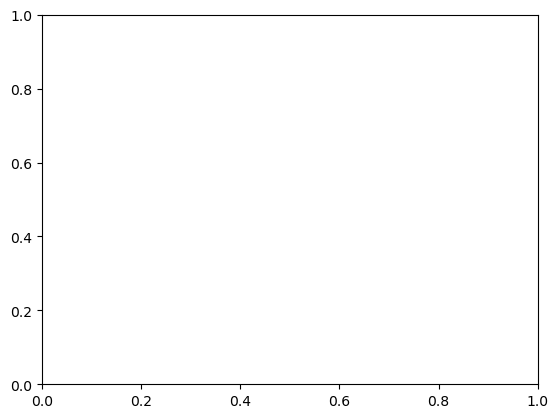

<Figure size 1500x700 with 0 Axes>

In [126]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,7))
ax.plot(sub_df.year, sub_df.total_alcohol)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')


fig.autofmt_xdate()
plt.tight_layout()


<Figure size 2000x700 with 0 Axes>

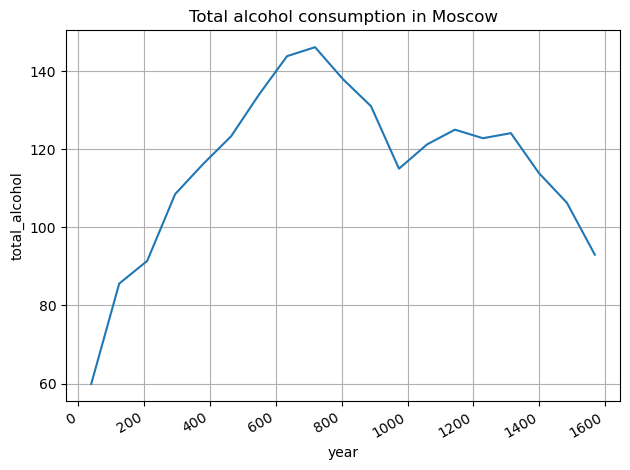

In [137]:
from matplotlib.ticker import FuncFormatter


sub_df = df_ml[df_ml['region'] == 'Moscow']
plt.figure(figsize=(20,7))


#def format_year(x, pos):
#       return f'{int(x)}'
    
fig, ax = plt.subplots()
ax.plot(sub_df['total_alcohol']) 
#ax.xaxis.set_major_formatter(FuncFormatter(format_year))



#plt.plot(sub_df['year'], sub_df['wine'])
plt.title("Total alcohol consumption in Moscow")
plt.xlabel('year')
plt.ylabel('total_alcohol')

plt.grid(True)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [129]:
sub_df

year  region   wine    beer  vodka  champagne  brandy  \
39   1998-01-01  Moscow   6.80   30.00  18.90       3.50     0.7   
124  1999-01-01  Moscow   6.60   56.00  18.70       3.60     0.7   
209  2000-01-01  Moscow   6.30   61.80  18.80       3.90     0.6   
294  2001-01-01  Moscow   5.00   78.90  19.70       4.20     0.7   
379  2002-01-01  Moscow   4.80   85.70  20.80       4.00     0.9   
464  2003-01-01  Moscow   6.20   89.10  23.00       4.10     0.9   
549  2004-01-01  Moscow   6.10   99.10  24.00       3.80     1.0   
634  2005-01-01  Moscow   6.40  108.50  24.20       3.70     1.0   
719  2006-01-01  Moscow   5.90  111.00  23.80       4.20     1.2   
804  2007-01-01  Moscow   7.30  101.40  22.90       4.80     1.5   
889  2008-01-01  Moscow   8.40   95.80  20.20       5.00     1.6   
974  2009-01-01  Moscow   9.40   79.70  19.30       4.80     1.8   
1059 2010-01-01  Moscow  10.10   87.80  16.60       4.90     1.8   
1144 2011-01-01  Moscow   9.85   91.28  16.92       5.14     1.8   
1229 2012-01-01  Moscow   9.70   89.90  16.50       5.00     1.7   
1314 2013-01-01  Moscow   8.80   92.50  16.00       5.10     1.7   
1399 2014-01-01  Moscow   8.50   82.90  15.70       5.10     1.7   
1484 2015-01-01  Moscow   7.50   79.50  13.30       4.50     1.5   
1569 2016-01-01  Moscow   6.60   69.20  12.10       4.00     1.1   

      total_alcohol  
39            59.90  
124           85.60  
209           91.40  
294          108.50  
379          116.20  
464          123.30  
549          134.00  
634          143.80  
719          146.10  
804          137.90  
889          131.00  
974          115.00  
1059         121.20  
1144         124.99  
1229         122.80  
1314         124.10  
1399         113.90  
1484         106.30  
1569          93.00

In [130]:
advanced_decomposition = STL(sub_df.total_alcohol, period=2).fit()

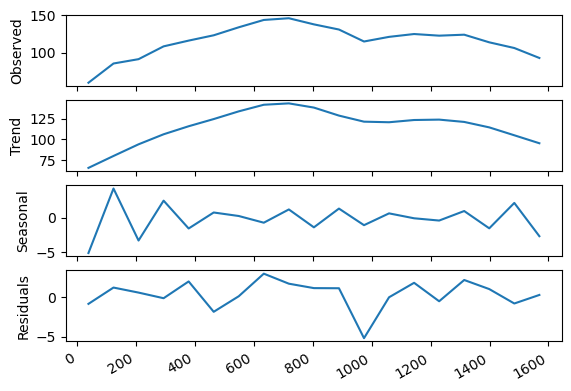

<Figure size 1500x700 with 0 Axes>

In [135]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)
plt.figure(figsize=(15,7))
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


#plt.xticks(np.arange(0, 19, 1), [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,2016])

fig.autofmt_xdate()
plt.tight_layout()


lets predict  total consumption in Moscow

ARIMA (Auto-Regressive Integrated Moving Average)

https://medium.com/@hazallgultekin/time-series-analysis-and-forecasting-with-arima-8be02ba2665a

In [138]:

from sklearn.metrics import mean_squared_error
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# close warnings
warnings.filterwarnings('ignore')

In [139]:
sub_df
sub_df["year"] = pd.to_datetime(sub_df["year"])
sub_df.set_index("year", inplace=True)

In [140]:
#sub_df["year"] = pd.to_datetime(sub_df["year"])
#sub_df.set_index("year", inplace=True)
sub_df.index

DatetimeIndex(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

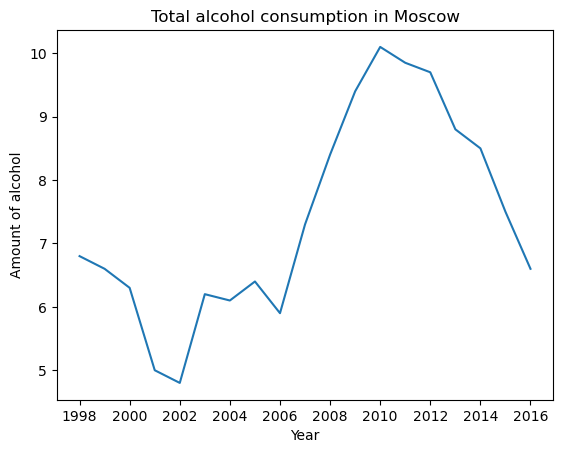

In [141]:
plt.plot(sub_df["wine"])
plt.title('Total alcohol consumption in Moscow')
plt.xlabel('Year')
plt.ylabel('Amount of alcohol')
plt.show()

Stationarity Test (Augmented Dickey-Fuller (ADF))

In [171]:
adf_test = adfuller(sub_df["wine"])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.835469
p-value: 0.002565


In [ ]:
p-value < 0,05 - данные стационарные

Finding ARIMA Parameters
We use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to find the ARIMA parameters.

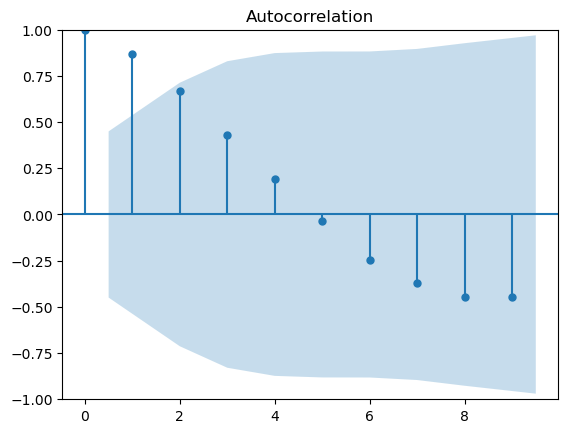

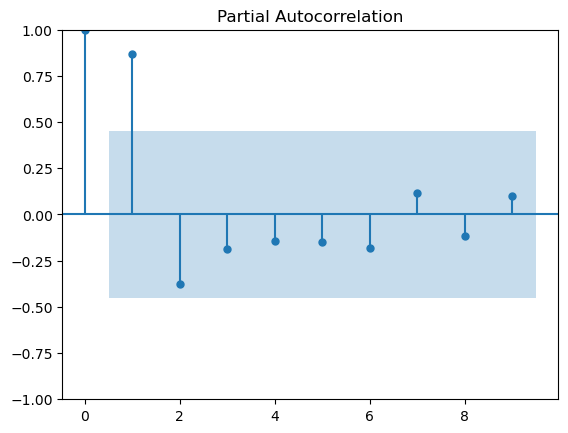

In [177]:
plot_acf(sub_df['wine'], lags=9)
plot_pacf(sub_df['wine'], lags=9)
plt.show()

 These plots suggest that an ARIMA(1, 0, 1) model may be a good starting point. - *Почему??*

In [178]:
model = ARIMA(sub_df['wine'], order=(1, 0, 1))
model_fit = model.fit()

In [181]:
forecast = model_fit.get_forecast(steps=30)

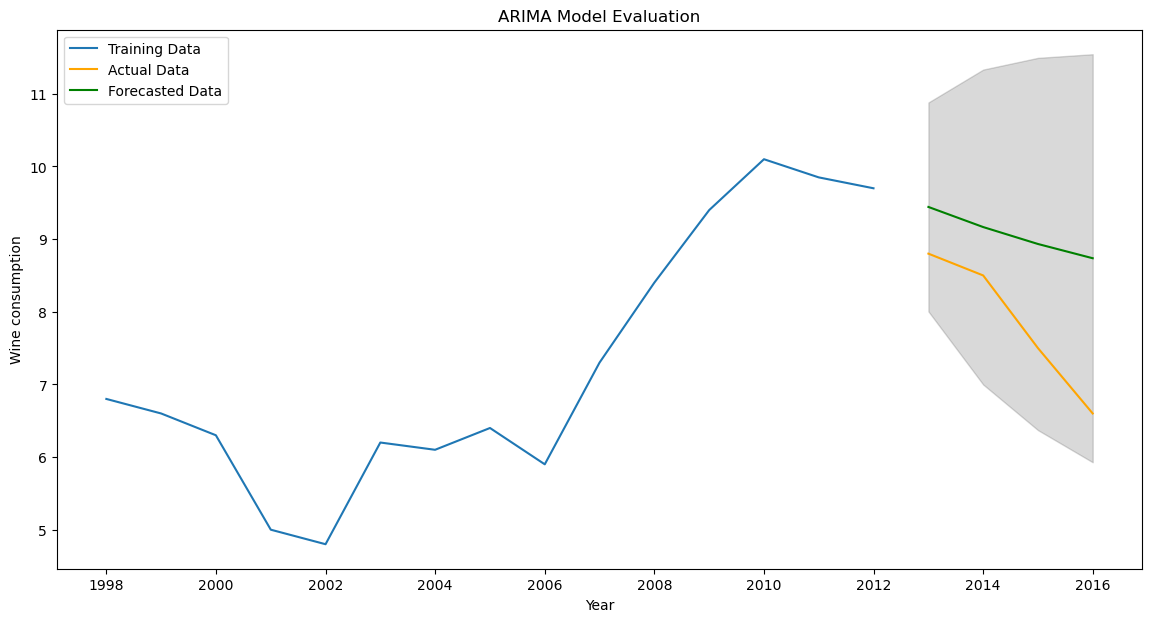

RMSE: 1.3672416190574568


In [45]:
# Split the data into train and test
train_size = int(len(sub_df) * 0.8)
train, test = sub_df[0:train_size], sub_df[train_size:len(sub_df)+1]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['wine'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['wine'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['wine'], label='Training Data')
plt.plot(test['wine'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('Wine consumption')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [11]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sub_df = df_ml[df_ml['region'] == 'Moscow']

In [14]:
sub_df = sub_df.set_index('year')


KeyError: "None of ['year'] are in the columns"

In [15]:
sub_df

region   wine    beer  vodka  champagne  brandy  total_alcohol
year                                                                      
1998-01-01  Moscow   6.80   30.00  18.90       3.50     0.7          59.90
1999-01-01  Moscow   6.60   56.00  18.70       3.60     0.7          85.60
2000-01-01  Moscow   6.30   61.80  18.80       3.90     0.6          91.40
2001-01-01  Moscow   5.00   78.90  19.70       4.20     0.7         108.50
2002-01-01  Moscow   4.80   85.70  20.80       4.00     0.9         116.20
2003-01-01  Moscow   6.20   89.10  23.00       4.10     0.9         123.30
2004-01-01  Moscow   6.10   99.10  24.00       3.80     1.0         134.00
2005-01-01  Moscow   6.40  108.50  24.20       3.70     1.0         143.80
2006-01-01  Moscow   5.90  111.00  23.80       4.20     1.2         146.10
2007-01-01  Moscow   7.30  101.40  22.90       4.80     1.5         137.90
2008-01-01  Moscow   8.40   95.80  20.20       5.00     1.6         131.00
2009-01-01  Moscow   9.40   79.70  19.30       4.80     1.8         115.00
2010-01-01  Moscow  10.10   87.80  16.60       4.90     1.8         121.20
2011-01-01  Moscow   9.85   91.28  16.92       5.14     1.8         124.99
2012-01-01  Moscow   9.70   89.90  16.50       5.00     1.7         122.80
2013-01-01  Moscow   8.80   92.50  16.00       5.10     1.7         124.10
2014-01-01  Moscow   8.50   82.90  15.70       5.10     1.7         113.90
2015-01-01  Moscow   7.50   79.50  13.30       4.50     1.5         106.30
2016-01-01  Moscow   6.60   69.20  12.10       4.00     1.1          93.00

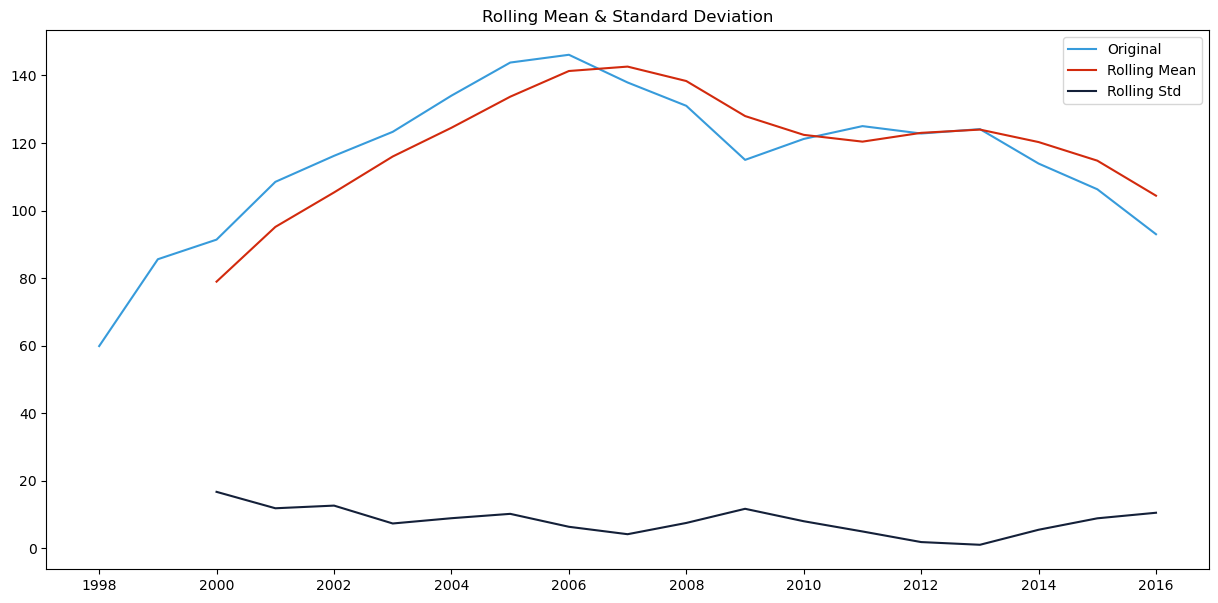

In [16]:
#Determine rolling statistics
sub_df["rolling_avg"] = sub_df["total_alcohol"].rolling(window=3).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
sub_df["rolling_std"] = sub_df["total_alcohol"].rolling(window=3).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(sub_df["total_alcohol"], color='#379BDB', label='Original')
plt.plot(sub_df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(sub_df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [285]:
sub_df

region   wine    beer  vodka  champagne  brandy  total_alcohol  \
year                                                                         
1998-01-01  Moscow   6.80   30.00  18.90       3.50     0.7          59.90   
1999-01-01  Moscow   6.60   56.00  18.70       3.60     0.7          85.60   
2000-01-01  Moscow   6.30   61.80  18.80       3.90     0.6          91.40   
2001-01-01  Moscow   5.00   78.90  19.70       4.20     0.7         108.50   
2002-01-01  Moscow   4.80   85.70  20.80       4.00     0.9         116.20   
2003-01-01  Moscow   6.20   89.10  23.00       4.10     0.9         123.30   
2004-01-01  Moscow   6.10   99.10  24.00       3.80     1.0         134.00   
2005-01-01  Moscow   6.40  108.50  24.20       3.70     1.0         143.80   
2006-01-01  Moscow   5.90  111.00  23.80       4.20     1.2         146.10   
2007-01-01  Moscow   7.30  101.40  22.90       4.80     1.5         137.90   
2008-01-01  Moscow   8.40   95.80  20.20       5.00     1.6         131.00   
2009-01-01  Moscow   9.40   79.70  19.30       4.80     1.8         115.00   
2010-01-01  Moscow  10.10   87.80  16.60       4.90     1.8         121.20   
2011-01-01  Moscow   9.85   91.28  16.92       5.14     1.8         124.99   
2012-01-01  Moscow   9.70   89.90  16.50       5.00     1.7         122.80   
2013-01-01  Moscow   8.80   92.50  16.00       5.10     1.7         124.10   
2014-01-01  Moscow   8.50   82.90  15.70       5.10     1.7         113.90   
2015-01-01  Moscow   7.50   79.50  13.30       4.50     1.5         106.30   
2016-01-01  Moscow   6.60   69.20  12.10       4.00     1.1          93.00   

            rolling_avg  rolling_std  
year                                  
1998-01-01          NaN          NaN  
1999-01-01          NaN          NaN  
2000-01-01    78.966667    16.764944  
2001-01-01    95.166667    11.905601  
2002-01-01   105.366667    12.693437  
2003-01-01   116.000000     7.402027  
2004-01-01   124.500000     8.960469  
2005-01-01   133.700000    10.253292  
2006-01-01   141.300000     6.425730  
2007-01-01   142.600000     4.229657  
2008-01-01   138.333333     7.559321  
2009-01-01   127.966667    11.747482  
2010-01-01   122.400000     8.067218  
2011-01-01   120.396667     5.043217  
2012-01-01   122.996667     1.902639  
2013-01-01   123.963333     1.101378  
2014-01-01   120.266667     5.551877  
2015-01-01   114.766667     8.931592  
2016-01-01   104.400000    10.578752

In [19]:

#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(sub_df['total_alcohol'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -3.003512
p-value                         0.034568
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [62]:
#Standard ARIMA Model for Moscow
ARIMA_model = pm.auto_arima(sub_df['total_alcohol'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

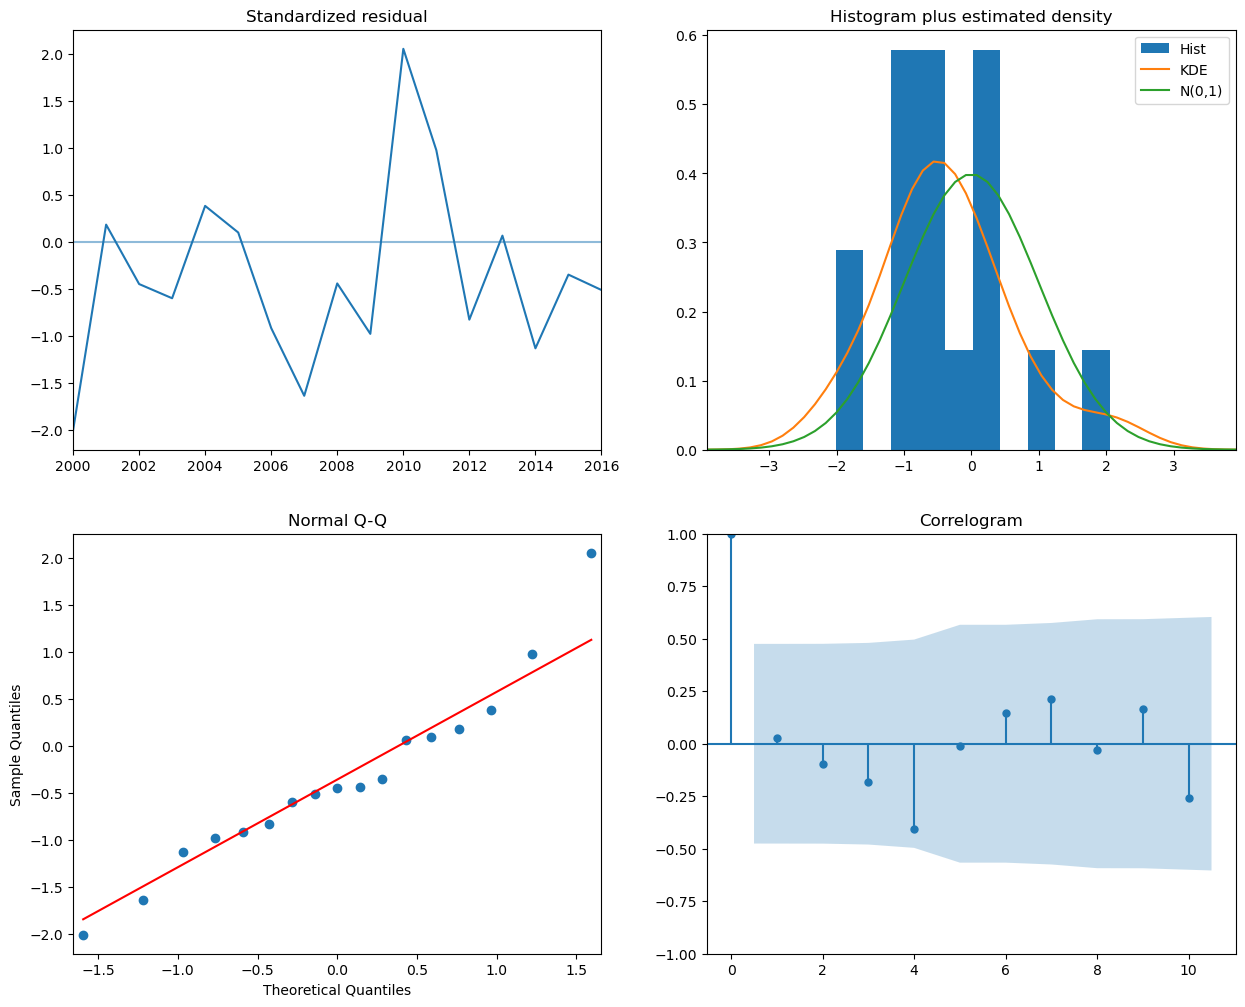

In [73]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [65]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 -60.925
Date:                Tue, 27 Aug 2024   AIC                            125.851
Time:                        16:14:27   BIC                            127.517
Sample:                    01-01-1998   HQIC                           126.017
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4883      0.264     -1.850      0.064      -1.006       0.029
sigma2        74.7226     31.380      2.381      0.017      13.219     136.226
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.90   Prob(JB):                         0.42
Heteroskedasticity (H):               0.69   Skew:                             0.69
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2017-01-01    82.483157
2018-01-01    70.607373
2019-01-01    59.395123
Freq: YS-JAN, dtype: float64
DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64[ns]', freq='YS-JAN')
[[ 65.54079351  99.42551962]
 [ 39.89858239 101.316163  ]
 [ 10.28754686 108.50269886]]


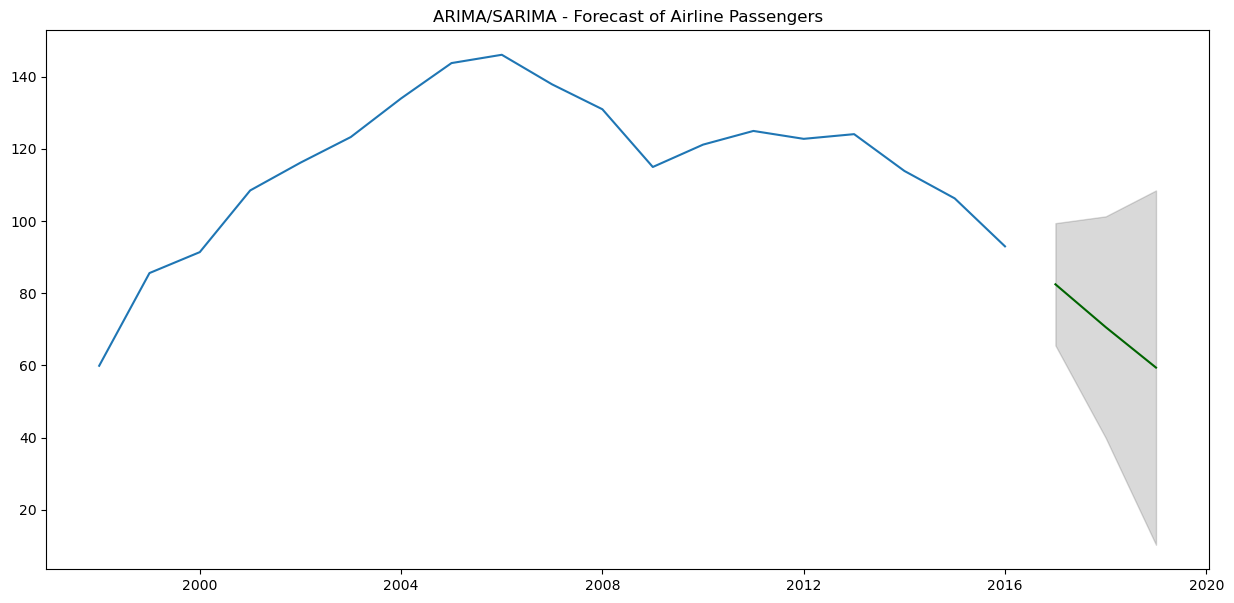

In [110]:

def forecast(ARIMA_model, periods=3):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(sub_df.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='AS-JAN')
    print(fitted)
    print(index_of_fc)
    print(confint)
    # make series for plotting purpose
    fitted_series = pd.Series(fitted)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(sub_df["total_alcohol"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

forecast(ARIMA_model)

In [101]:
fitted, confint = ARIMA_model.predict(n_periods=5, return_conf_int=True)
index_of_fc = pd.date_range(sub_df.index[-1] + pd.DateOffset(years=1), periods = 5, freq='Y')
print(fitted)
print(index_of_fc)  
#fitted_series = pd.Series(fitted[:],index=index_of_fc)
#fitted_series 
f = pd.Series(fitted)
f.index

2017-01-01    82.483157
2018-01-01    70.607373
2019-01-01    59.395123
2020-01-01    47.858887
2021-01-01    36.480845
Freq: YS-JAN, dtype: float64
DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')


DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [28]:
sub_df.index

DatetimeIndex(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [52]:
ARIMA_model.fit(sub_df["total_alcohol"])


ARIMA(order=(1, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [111]:
#Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(sub_df["total_alcohol"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=2, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [112]:
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   19
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 2)   Log Likelihood                 -58.315
Date:                           Tue, 27 Aug 2024   AIC                            118.629
Time:                                   16:45:01   BIC                            119.337
Sample:                               01-01-1998   HQIC                           118.622
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       139.4051     49.140      2.837      0.005      43.093     235.717
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.35   Prob(JB):                         0.62
Heteroskedasticity (H):               1.64   Skew:                            -0.60
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

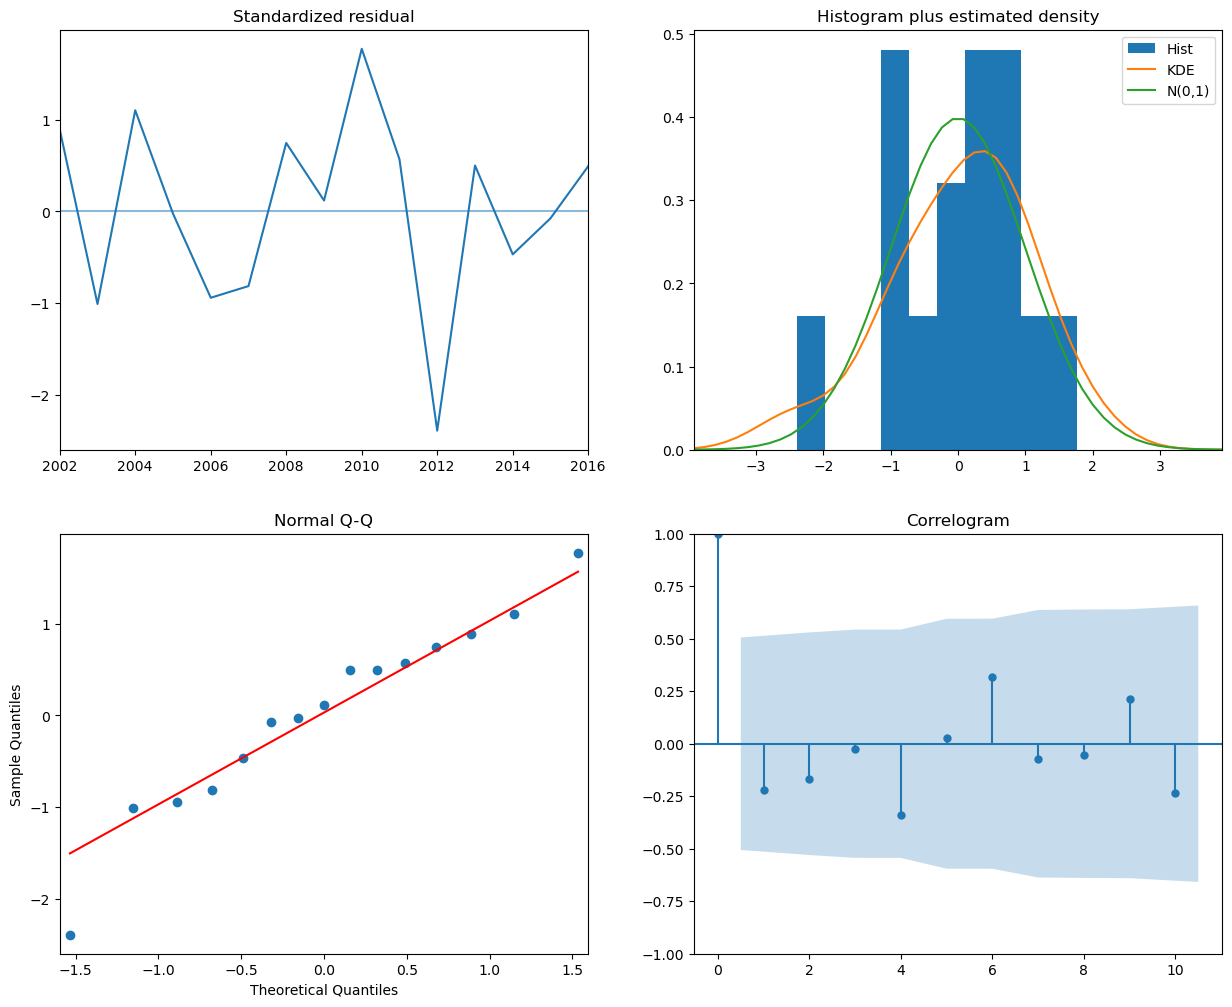

In [113]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

2017-01-01    82.3
2018-01-01    65.9
2019-01-01    52.1
Freq: YS-JAN, dtype: float64
DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64[ns]', freq='YS-JAN')
[[ 59.15871436 105.44128564]
 [ 14.15451223 117.64548777]
 [-53.9466931  158.1466931 ]]


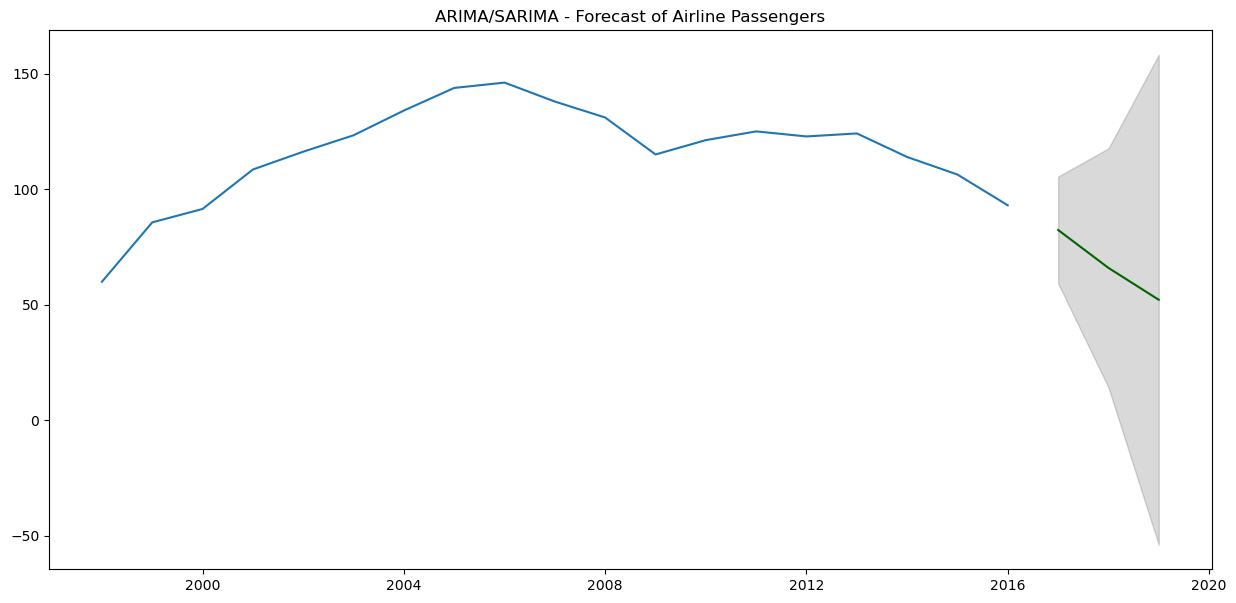

In [115]:
forecast(SARIMA_model)

In [116]:
sub_df


region   wine    beer  vodka  champagne  brandy  total_alcohol  \
year                                                                         
1998-01-01  Moscow   6.80   30.00  18.90       3.50     0.7          59.90   
1999-01-01  Moscow   6.60   56.00  18.70       3.60     0.7          85.60   
2000-01-01  Moscow   6.30   61.80  18.80       3.90     0.6          91.40   
2001-01-01  Moscow   5.00   78.90  19.70       4.20     0.7         108.50   
2002-01-01  Moscow   4.80   85.70  20.80       4.00     0.9         116.20   
2003-01-01  Moscow   6.20   89.10  23.00       4.10     0.9         123.30   
2004-01-01  Moscow   6.10   99.10  24.00       3.80     1.0         134.00   
2005-01-01  Moscow   6.40  108.50  24.20       3.70     1.0         143.80   
2006-01-01  Moscow   5.90  111.00  23.80       4.20     1.2         146.10   
2007-01-01  Moscow   7.30  101.40  22.90       4.80     1.5         137.90   
2008-01-01  Moscow   8.40   95.80  20.20       5.00     1.6         131.00   
2009-01-01  Moscow   9.40   79.70  19.30       4.80     1.8         115.00   
2010-01-01  Moscow  10.10   87.80  16.60       4.90     1.8         121.20   
2011-01-01  Moscow   9.85   91.28  16.92       5.14     1.8         124.99   
2012-01-01  Moscow   9.70   89.90  16.50       5.00     1.7         122.80   
2013-01-01  Moscow   8.80   92.50  16.00       5.10     1.7         124.10   
2014-01-01  Moscow   8.50   82.90  15.70       5.10     1.7         113.90   
2015-01-01  Moscow   7.50   79.50  13.30       4.50     1.5         106.30   
2016-01-01  Moscow   6.60   69.20  12.10       4.00     1.1          93.00   

            rolling_avg  rolling_std  
year                                  
1998-01-01          NaN          NaN  
1999-01-01          NaN          NaN  
2000-01-01    78.966667    16.764944  
2001-01-01    95.166667    11.905601  
2002-01-01   105.366667    12.693437  
2003-01-01   116.000000     7.402027  
2004-01-01   124.500000     8.960469  
2005-01-01   133.700000    10.253292  
2006-01-01   141.300000     6.425730  
2007-01-01   142.600000     4.229657  
2008-01-01   138.333333     7.559321  
2009-01-01   127.966667    11.747482  
2010-01-01   122.400000     8.067218  
2011-01-01   120.396667     5.043217  
2012-01-01   122.996667     1.902639  
2013-01-01   123.963333     1.101378  
2014-01-01   120.266667     5.551877  
2015-01-01   114.766667     8.931592  
2016-01-01   104.400000    10.578752